## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

## Importing files and data preparation for EDA

### Ratings 

In [2]:
health_rating = pd.read_csv("ratings_Health_and_Personal_Care.csv", header = None)

health_rating.columns = ["UserID", "asin", "Rating", "TimeStamp"]

health_rating.head(2)

,UserID,asin,Rating,TimeStamp
0,ARMDSTEI0Z7YW,0077614992,5.0,1360886400
1,A3FYN0SZYWN74,0615208479,5.0,1228089600


In [3]:
health_rating['TimeStamp'] = health_rating['TimeStamp'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
health_rating['year'] = health_rating['TimeStamp'].apply(lambda x: int(x[:4]))
health_rating['Month'] = health_rating['TimeStamp'].apply(lambda x: int(x[5:7]))
health_rating['Day'] = health_rating['TimeStamp'].apply(lambda x: int(x[8:]))
health_rating = health_rating.drop('TimeStamp',axis = 1)
health_rating["Category"] = "Health"
health_rating.head(2)

,UserID,asin,Rating,year,Month,Day,Category
0,ARMDSTEI0Z7YW,0077614992,5.0,2013,2,15,Health
1,A3FYN0SZYWN74,0615208479,5.0,2008,12,1,Health


In [4]:
health_rating.isnull().any()

UserID      False
asin        False
Rating      False
year        False
Month       False
Day         False
Category    False
dtype: bool

In [5]:
sports_rating = pd.read_csv("ratings_Sports_and_Outdoors.csv", header = None)
sports_rating.columns = ["UserID", "asin", "Rating", "TimeStamp"]

sports_rating['TimeStamp'] = sports_rating['TimeStamp'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
sports_rating['year'] = sports_rating['TimeStamp'].apply(lambda x: int(x[:4]))
sports_rating['Month'] = sports_rating['TimeStamp'].apply(lambda x: int(x[5:7]))
sports_rating['Day'] = sports_rating['TimeStamp'].apply(lambda x: int(x[8:]))
sports_rating = sports_rating.drop('TimeStamp',axis = 1)
sports_rating['Category'] = "Sports"

sports_rating.head(2)

,UserID,asin,Rating,year,Month,Day,Category
0,A3PMSRCL80KSA1,0000031852,4.0,2013,12,29,Sports
1,A1SNLWGLFXD70K,0000031852,4.0,2014,2,21,Sports


In [6]:
sports_rating.isnull().any()

UserID      False
asin        False
Rating      False
year        False
Month       False
Day         False
Category    False
dtype: bool

### One user  one product one rating

In [7]:
health_rating.groupby(by = ["UserID","asin"]).Rating.count().reset_index(name = "count")\
.sort_values("count", ascending = False).head(6)

,UserID,asin,count
0,A0000726154QG4JYYPS1W,B00A3LVMMQ,1
1988210,A3IRTRPYAJ60XE,B00014G39W,1
1988212,A3IRTRPYAJ60XE,B0015NZ6FK,1
1988213,A3IRTRPYAJ60XE,B001GABJTY,1
1988214,A3IRTRPYAJ60XE,B0027OUUFW,1
1988215,A3IRTRPYAJ60XE,B0033AGVBG,1


In [8]:
sports_rating.groupby(by = ["UserID","asin"]).Rating.count().reset_index(name = "count")\
.sort_values("count", ascending = False).head(6)

,UserID,asin,count
0,A00000922W28P2OCH6JSE,B000VEBG9Y,1
2179123,A3IKPSOG56HVVK,B000R2YS5Y,1
2179125,A3IKPSOG56HVVK,B004WNJH7I,1
2179126,A3IKPUDXE73AV8,B001E4XL3E,1
2179127,A3IKPXG0E5CJSP,B000OZDGRK,1
2179128,A3IKPXG0E5CJSP,B00165U0T4,1


### Saving the data into a csv file for EDA

In [9]:
#Saving file containing both sports and health care

ratings = pd.concat([sports_rating, health_rating], axis = 0).reset_index(drop = True)
#ratings.to_csv("Ratings_processed.csv")

## Reviews

In [10]:
health_review = pd.read_json("Health_and_Personal_Care_5.json", lines = True)
health_review.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5,Handy little gadget,1294185600,"01 5, 2011"
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4,Small & may need to encourage battery,1329523200,"02 18, 2012"


In [11]:
health_review.isnull().sum() 

reviewerID           0
asin                 0
reviewerName      3051
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [12]:
sports_review = pd.read_json("Sports_and_Outdoors_5.json", lines = True)
sports_review.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5,Woks very good,1390694400,"01 26, 2014"
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5,Works as well as the factory tool,1328140800,"02 2, 2012"


In [13]:
sports_review.isnull().sum()

reviewerID           0
asin                 0
reviewerName      1402
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

#### Null values: both reviews data has null values in reviewer Name column

### One user one product one review

In [14]:
#Uniqueness of the data
health_review.groupby(by = ["reviewerID","asin"]).reviewText.count().reset_index(name = "count")\
.sort_values("count", ascending = False).head(3)

,reviewerID,asin,count
0,A0010876CNE3ILIM9HV0,B003983HRI,1
230900,A3IQFC5I1NA9EU,B00E9M4XE4,1
230908,A3IQW7SVRFBCQ8,B0009WXEIY,1


In [15]:
sports_review.groupby(by = ["reviewerID","asin"]).reviewText.count().reset_index(name = "count")\
.sort_values("count", ascending = False).head(3)

,reviewerID,asin,count
0,A00046902LP5YSDV0VVNF,B0010O748Q,1
197511,A3IUD6OUAS0A9K,B00286M5OS,1
197563,A3IUO5U80PBY7N,B003BLOSLC,1


### Reviews - data preparation

In [16]:
#funtion to transform helpful column
def ratio(a,b):
    if b!=0:
        return round(a/b,2)
    elif a == 0 and b == 0:      #to bypass ZeroDivisionError
        return 0
    elif a!=0 and b ==0:
        raise ZeroDivisionError() 
        
        
#Function to process all desired changes in the dataframe
def trans(df):
    #Changing the datetime format into date format
    df['Date'] = df['unixReviewTime'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
    df['year'] = df['Date'].apply(lambda x: int(x[:4]))                #creating year
    df['Month'] = df['Date'].apply(lambda x: int(x[5:7]))              #Creating Month
    df['Day'] = df['Date'].apply(lambda x: int(x[8:]))                 #Creating Day
    df["helpful_ratio"] = df["helpful"].apply(lambda x: ratio(x[0],x[1]))        #Ratio of helpfulness [2,3] = 2/3
    df["helpful_max"] = df["helpful"].apply(lambda x: x[1])                      #maximum marked for helpfulness [2,3] = 3
    df["char_count"] = df["reviewText"].apply(lambda x: len(x))                  #Character count  of reviewText
    df["word_count"] = df["reviewText"].apply(lambda x: len(x.split(" ")))       #Word count of reviewText
    df = df.drop(["reviewerName", "reviewTime", "unixReviewTime", "helpful"], axis = 1) #Dropping unwanted columns
    return df

In [17]:
#Transforming Sports reviews
sports_review = trans(sports_review)
sports_review["Category"] = "Sports"
sports_review.head(3)

,reviewerID,asin,reviewText,overall,summary,Date,year,Month,Day,helpful_ratio,helpful_max,char_count,word_count,Category
0,AIXZKN4ACSKI,1881509818,This came in on time and I am veru happy with ...,5,Woks very good,2014-01-26,2014,1,26,0.0,0,131,30,Sports
1,A1L5P841VIO02V,1881509818,I had a factory Glock tool that I was using fo...,5,Works as well as the factory tool,2012-02-02,2012,2,2,1.0,1,275,58,Sports
2,AB2W04NI4OEAD,1881509818,If you don't have a 3/32 punch or would like t...,4,"It's a punch, that's all.",2012-02-28,2012,2,28,1.0,2,234,51,Sports


In [18]:
#Transforming Health reviews
health_review = trans(health_review)
health_review["Category"] = "Health"
health_review.head(3)

,reviewerID,asin,reviewText,overall,summary,Date,year,Month,Day,helpful_ratio,helpful_max,char_count,word_count,Category
0,ALC5GH8CAMAI7,159985130X,This is a great little gadget to have around. ...,5,Handy little gadget,2011-01-05,2011,1,5,1.00,1,224,46,Health
1,AHKSURW85PJUE,159985130X,I would recommend this for a travel magnifier ...,4,Small & may need to encourage battery,2012-02-18,2012,2,18,1.00,1,520,101,Health
2,A38RMU1Y5TDP9,159985130X,What I liked was the quality of the lens and t...,4,Very good but not great,2010-06-08,2010,6,8,0.97,77,1199,231,Health


### Saving the data into a csv file for EDA

In [19]:
sports_review_txt = sports_review.drop(["reviewText","summary"], axis = 1)
health_review_txt = health_review.drop(["reviewText","summary"], axis = 1)
txt = pd.concat((sports_review_txt, health_review_txt),axis = 0).reset_index(drop = True)
len(txt)
#txt.to_csv("Reviews_processed.csv")

642692

In [20]:
text = pd.concat((sports_review, health_review),axis = 0).reset_index(drop = True)
text.head()

,reviewerID,asin,reviewText,overall,summary,Date,year,Month,Day,helpful_ratio,helpful_max,char_count,word_count,Category
0,AIXZKN4ACSKI,1881509818,This came in on time and I am veru happy with ...,5,Woks very good,2014-01-26,2014,1,26,0.0,0,131,30,Sports
1,A1L5P841VIO02V,1881509818,I had a factory Glock tool that I was using fo...,5,Works as well as the factory tool,2012-02-02,2012,2,2,1.0,1,275,58,Sports
2,AB2W04NI4OEAD,1881509818,If you don't have a 3/32 punch or would like t...,4,"It's a punch, that's all.",2012-02-28,2012,2,28,1.0,2,234,51,Sports
3,A148SVSWKTJKU6,1881509818,This works no better than any 3/32 punch you w...,4,It's a punch with a Glock logo.,2012-02-05,2012,2,5,0.0,0,167,34,Sports
4,AAAWJ6LW9WMOO,1881509818,I purchased this thinking maybe I need a speci...,4,"Ok,tool does what a regular punch does.",2013-04-23,2013,4,23,0.0,0,245,50,Sports


In [21]:
#duplicate reviewTexts by users
text.groupby(["reviewerID", "reviewText"])["reviewText"].count()\
.reset_index(name = "count").sort_values("count", ascending = False).head()

,reviewerID,reviewText,count
134095,A1SKNFXR9R02S5,I spend way to much time sitting at a computer...,2
499190,A5MKILTPX5N83,The concept of this is awesome. And it worked ...,2
558228,AI0GKVKUTFZGR,"I get shin splints, especially acute in one le...",2
480253,A3TP31S61PPE3G,I started running this last year and have had ...,2
14158,A12XU0XOX20S86,I use this wash and waterproofer on all my sof...,2


In [22]:
#duplicate reviewTexts by products
text.groupby(["asin", "reviewText"])["reviewText"].count()\
.reset_index(name = "count").sort_values("count", ascending = False).head()

,asin,reviewText,count
112350,B000IXG44U,,2
175316,B000ZLS70E,it has pretty much everything you need to clea...,2
609524,B00D0YFKDK,"Came from China, took exactly 2 weeks to recei...",2
635874,B00I2WB2JG,I tried these after a friend suggested them. I...,2
638388,B00J09K8EA,I've had some minor thyroid problems that have...,2


In [23]:
test = text.drop_duplicates(["asin", "summary"], keep = "first")
test = test.drop_duplicates(["reviewerID","reviewText"], keep = "first")
test["review"] = test["reviewText"] + test["summary"]
test = test.drop(["reviewText","summary", "Day","year", "Month", "helpful_ratio", "helpful_max", "char_count", "word_count", "overall"],axis = 1)
test.head()

,reviewerID,asin,Date,Category,review
0,AIXZKN4ACSKI,1881509818,2014-01-26,Sports,This came in on time and I am veru happy with ...
1,A1L5P841VIO02V,1881509818,2012-02-02,Sports,I had a factory Glock tool that I was using fo...
2,AB2W04NI4OEAD,1881509818,2012-02-28,Sports,If you don't have a 3/32 punch or would like t...
3,A148SVSWKTJKU6,1881509818,2012-02-05,Sports,This works no better than any 3/32 punch you w...
4,AAAWJ6LW9WMOO,1881509818,2013-04-23,Sports,I purchased this thinking maybe I need a speci...


In [24]:
#test.to_csv("Amazon_data.csv")

# 1. Text analysis of reviews data
##  Data pre-processing for text analysis

In [25]:
#Contractions to be expanded
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}

In [26]:
#!pip install autocorrect
#!python -m spacy download en_core_web_lg

In [27]:
#Libraries used in text pre-processing
import spacy
nlp = spacy.load("en_core_web_lg")

import unicodedata
import re
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from autocorrect import Speller as spell
sp = spell(lang = 'en')


#Function to expand contractions
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x
    
#Function to remove accented characters
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD',x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x




# The main function for text-preprocessing
def cleanse(df,col):
    
    email = r'([a-z0-9._-]+@[a-z0-9._-]+\.[a-z0-9._-]+)'
    url = r'(?:http|https|ftp|ssh):\/\/(?:www\.)?[a-z0-9-_]+\.(?:com|org|net)+\/\S+'
    spec_char = r'[^\w ]+'
    num = r'[0-9]+'
    dd = df[str(col)]
    
    #Lower case
    dd = dd.apply(lambda x : x.lower()) 
    
    #Accented characters
    dd = dd.apply(lambda x: remove_accented_chars(x))
    
    #remove html tags,url, email
    dd = dd.apply(lambda x: re.sub(email,"",x)) #email removal
    
    dd = dd.apply(lambda x: re.sub(url,"",x)) #Remove url

    #Spelling correction
    dd = dd.apply(lambda x: sp.autocorrect_sentence(x))
    
    #Special characters removal, punctuation removal
    dd = dd.apply(lambda x: " ".join([ t.text for t in nlp(x) if not t.is_punct ])) #Removing punctuations
    dd = dd.apply(lambda x: re.sub(spec_char,"",x)) #Remove special characters
    
    #contractions expanding
    dd = dd.apply(lambda x: cont_to_exp(x))

    #Stop words
    dd = dd.apply(lambda x: " ".join([ t for t in x.split() if t not in stopwords])) 
    
    # Lemmatization 
    dd = dd.apply(lambda x: " ".join([ t.lemma_ for t in nlp(x)]))
    
    #Remove numbers
    dd = dd.apply(lambda x: re.sub(num,"",x))
    
    
    #Extra white spaces
    dd = dd.apply(lambda x: " ".join(x.split()))
    return dd

## Sentiment analysis

In [28]:
from textblob import TextBlob

def score_polarity(a):
    tb = TextBlob(a).sentiment
    prob = tb.polarity
    if prob >= 0.60:
        return "strongly positive"
    elif prob >= 0.10:
        return "positive"
    elif prob > -0.10:
        return "neutral"
    elif prob > -0.60:
        return "negative"
    elif prob <= -0.60:
        return "strongly negative"

## CAUTION! : Don't trigger the following cell on the whole(humongus dataset). 
## The pre-processed file is imported in the next cell for convinience. 

### Final file with sentiments

In [29]:
#Importing pre-processed data with sentiments
product = pd.read_csv("sentiments_amazon.csv")
print(product.shape)
product.head(7)

(634002, 7)


,Unnamed: 0,reviewerID,asin,Date,Category,review,sentiment
0,0,AIXZKN4ACSKI,1881509818,2014-01-26,Sports,come time happy make take pin block easy work ...,strongly positive
1,1,A1L5P841VIO02V,1881509818,2012-02-02,Sports,factory block tool block ve lose need ve ghost...,positive
2,2,AB2W04NI4OEAD,1881509818,2012-02-28,Sports,nt punch like block bag okay butt end handy pu...,positive
3,3,A148SVSWKTJKU6,1881509818,2012-02-05,Sports,work well punch find hardware store actually t...,neutral
4,4,AAAWJ6LW9WMOO,1881509818,2013-04-23,Sports,purchase thinking maybe need special tool easi...,neutral
5,5,A2XX2A4OJCDNLZ,1881509818,2012-11-02,Sports,need tool break g work perfectly difference oe...,strongly positive
6,6,A283UOBQRUNM4Q,1881509818,2014-06-10,Sports,not need completely block model gen great tool,positive


In [30]:
neg = product [product["sentiment"] == "strongly negative"]
neg.head()

,Unnamed: 0,reviewerID,asin,Date,Category,review,sentiment
1586,1586,A1E9BNKOSRIYCB,B00006I5RH,2013-03-08,Sports,like pen not write surface lie s cold ll hate ...,strongly negative
1785,1785,A2E6R7YGPYD7BN,B00007E1M5,2012-08-17,Sports,usa seal team knife twain not buy knife buy co...,strongly negative
1876,1876,A1UVU2ONHJJKOP,B00008XXX1,2010-02-06,Sports,sign feed fear pa profit buy pa laden bottle p...,strongly negative
2029,2029,A9HVL5TGF897Q,B00009YV6L,2014-01-13,Sports,recommend not snap shade dollar knife ve year ...,strongly negative
2610,2610,A2QXG8LOXOT32O,B0000ATYTG,2013-01-13,Sports,ugly work not care look want work tie kayak pr...,strongly negative


### WordCloud for all strongly negative reviews

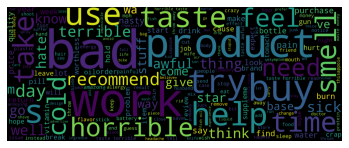

In [31]:
#!pip install wordcloud
from wordcloud import WordCloud

#Word cloud for strongly negative sentiments
rev = " ".join(neg["review"]).replace("nt","")


wc = WordCloud(width = 5000, height = 2000).generate(rev)
plt.imshow(wc)
plt.axis('off')
plt.show()

### WordCloud for products with more than one strongly negative reviews

In [32]:
asic_count = neg.groupby("asin")["sentiment"].count().reset_index(name = "count").sort_values(by = "count", ascending = False)
neg_reviews = pd.DataFrame(asic_count[asic_count["count"] > 1]["asin"]).reset_index(drop = True)

from wordcloud import wordcloud

def reasons():
    print("Pick from the following products with multiple strongly negative sentiments:\n")
    for i in range (10):
        print(" |%2s| %10s"%("SN" , "ProductID"), end = " ")
    print("\n","-"*170)
    for i,j in list(enumerate(neg_reviews["asin"])) :
        print(" |%2d| %10s"%(i , j), end = " ")
        if (i + 1)%10 == 0:
            print()
    print("\n"*2)
    n = 0
    while n == 0:
        try:
            #ind = 22
            ind = int(input("Enter a Serial No. :"))
            if ind < 66 or ind >=0 :
                n = 1
                reviews = " ".join(neg[neg["asin"] == neg_reviews.iloc[ind]["asin"]]["review"])
                reviews = reviews.replace("nt", "")
                #print(reviews)
            else:
                raise ValueError
        except:
            print ("Please select an integer between %d to %d"%(0, len(neg_reviews)))
            n = 0
    print("Word cloud is generating...")
    wc = WordCloud(width = 5000, height = 2000).generate(reviews)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

Pick from the following products with multiple strongly negative sentiments:

 |SN|  ProductID  |SN|  ProductID  |SN|  ProductID  |SN|  ProductID  |SN|  ProductID  |SN|  ProductID  |SN|  ProductID  |SN|  ProductID  |SN|  ProductID  |SN|  ProductID 
 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 | 0| B001949TKS  | 1| B0009EXOZA  | 2| B0002IL6M6  | 3| B0001LB47Q  | 4| B001DB4MFO  | 5| B003V5LXEI  | 6| B002J0RG2O  | 7| B0026HDURA  | 8| B001FXUTUM  | 9| B000AO5L8W 
 |10| B002XULC84  |11| B005HA0H3S  |12| B00027C9DM  |13| B00028MKRQ  |14| B00A2HFS1M  |15| B009L4D02Q  |16| B002OKWHVO  |17| B0002IKANW  |18| B0036BCXXC  |19| B0040XCTP2 
 |20| B00024D19Q  |21| B001GAOGGM  |22| B0001TNP6G  |23| B0001LJ3OW  |24| B000KOPX4O  |25| B0055CJ2NO  |26| B001HBHNHE  |27| B00020IFA0  |28| B0013OZCGE  |29| B001F0RA20 
 |30| B001F0R9EY  |31| B003B6X66U  |32| B0078W0QOI  |33| B0018A32X

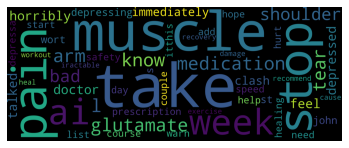

In [33]:
reasons()     #Finding the reason for products with more than one strongly negative comments

In [34]:
## Name of the product with serial number 22
mine = "B0001TNP6G"

data = pd.read_csv("Amazon_data.csv") #Data before pre-processing
 
from collections import Counter
nlp = spacy.load('en_core_web_lg')
#Single product

use = nlp(" " .join(data[data.asin == mine]["review"]).lower())
counts = Counter()
for j in use:
    if j.pos_ == "NOUN":
        counts[j.orth_] += 1
a = []
for k in counts.most_common(4):
    a.append(k[0])
print(" ".join(a))

glutamine - l supplement


## 2. Name of the products

In [35]:
#!python -m spacy download en_core_web_lg
import spacy
nlp = spacy.load('en_core_web_lg')
print(nlp.pipe_names)
#nlp.disable_pipes('ner', 'lemmatizer')
#print(nlp.pipe_names)

from collections import Counter

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [36]:
#FInding products with more reviews

rev= data[["review", "asin"]]
ans = rev.groupby(["asin"]).count().sort_values(by = "review", ascending = False).head(25)   #25 products with most reviews
print(len(ans))
ans.head()

25


,review
asin,
B0037KMI0U,1032
B001HBHNHE,911
B001T7QJ9O,698
B0010JLMO8,688
B001KXZ808,616


In [37]:
#Concatenating all the reviews and grouped by product id

p_name  = list(ans.index)
prod = pd.DataFrame()
for i in p_name:
    dt = " ".join(rev[rev["asin"] == i]["review"])
    ea = pd.DataFrame([i,dt]).T
    prod = pd.concat([prod,ea],axis = 0)
prod.columns = ["asin", "text"]
prod = prod.reset_index(drop = True)
print(len(prod))
prod.head()

25


,asin,text
0,B0037KMI0U,"I remember many years ago, my ex wife always w..."
1,B001HBHNHE,Got the rifle mag too!!!!!! Great product tha...
2,B001T7QJ9O,"GREAT PRODUCT, WORKS WELL Five Stars I am very..."
3,B0010JLMO8,I love this I use it everyday! Before and afte...
4,B001KXZ808,Accurate and easy to use. Stylish. Came with...


In [38]:
%%time
# Multiple product names
li = []
for i in range(len(prod)):
    #print("asin=", prod.iloc[i]["asin"])
    print(len(prod) - i, end  = " ")
    use = nlp(prod.iloc[i]["text"].lower())
    counts = Counter()
    for j in use:
        if j.pos_ == "NOUN":
            counts[j.orth_] += 1
    a = []
    for k in counts.most_common(3):
        #print("k=", k)
        a.append(k[0])
    name = " ".join(a)
    li.append([prod.iloc[i]["asin"], name])

prod_names = pd.DataFrame(li, columns=["asin","prod_name"])
prod_names.head()

25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 Wall time: 7min 12s


,asin,prod_name
0,B0037KMI0U,tide detergent clothes
1,B001HBHNHE,loader magazines magazine
2,B001T7QJ9O,range protection noise
3,B0010JLMO8,bottle protein blender
4,B001KXZ808,scale weight time


In [39]:
#Interpretation of the result recevied
inter = ["tide clothes detergent", "magazine loader", "ear plugs", "protein blender bottle", "weight scale","paracord", "nose hair trimmer",\
        "magnesium fire starter", "chocolate whey protein", "deodorant", "deodorant", "energy drink", "shaving razor", "tide pods detergent",\
        "mist  humidifier", "barrel bore cleaner", "toilet paper", "weight scale", "rail flashlight", "laser bore sight",\
        "vitamin b-12 supplement", "emergency blanket", "magazine loader", "penetrex pain relief", "stove"]
inter = pd.DataFrame(inter, columns = ["Interpretation"])
inter.head()

,Interpretation
0,tide clothes detergent
1,magazine loader
2,ear plugs
3,protein blender bottle
4,weight scale


In [40]:
products = pd.concat([prod_names, inter], axis = 1)
products

,asin,prod_name,Interpretation
0,B0037KMI0U,tide detergent clothes,tide clothes detergent
1,B001HBHNHE,loader magazines magazine,magazine loader
2,B001T7QJ9O,range protection noise,ear plugs
3,B0010JLMO8,bottle protein blender,protein blender bottle
4,B001KXZ808,scale weight time,weight scale
5,B000S5ODN2,paracord cord stuff,paracord
6,B0049LUI9O,nose trimmer hair,nose hair trimmer
7,B0010O748Q,fire magnesium starter,magnesium fire starter
8,B000GIPJY8,protein chocolate whey,chocolate whey protein
9,B001F51VRK,product deodorant strength,deodorant


### Conclusion: Few product names are derived from the reviews of products

## 3. Time series analysis and forecasting sentiment trends

In [26]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf


from statsmodels.tsa.seasonal import seasonal_decompose

# !pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


#SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX


from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [27]:
data = pd.read_csv("sentiments_amazon.csv", parse_dates = ["Date"])
data.head(1)

,Unnamed: 0,reviewerID,asin,Date,Category,review,sentiment
0,0,AIXZKN4ACSKI,1881509818,2014-01-26,Sports,come time happy make take pin block easy work ...,strongly positive


In [28]:
#Inserting scores for time series analysis

scoring = {"strongly negative": -2, "negative": -1, "neutral": 0, "positive": 1, "strongly positive": 2}

data["score"] = data["sentiment"].replace(scoring)

data.head(1)

,Unnamed: 0,reviewerID,asin,Date,Category,review,sentiment,score
0,0,AIXZKN4ACSKI,1881509818,2014-01-26,Sports,come time happy make take pin block easy work ...,strongly positive,2


In [29]:
#Preparing time series data
df = data[["Date", "score"]].sort_values(by = "Date", ascending = True).set_index("Date")
sent = df.resample("M").mean()
sent
sent.head()

,score
Date,
2000-12-31,0.5
2001-01-31,0.0
2001-02-28,NaN
2001-03-31,1.0
2001-04-30,1.0


In [30]:
#Last NaN values
sent[sent.score.isnull()].tail(2)

,score
Date,
2002-02-28,NaN
2002-04-30,NaN


In [31]:
sent2 = sent [sent.index.year > 2002] #Removing null values
sent2.head()

,score
Date,
2003-01-31,1.000000
2003-02-28,0.333333
2003-03-31,1.250000
2003-04-30,1.250000
2003-05-31,1.000000


#### Plotting given data

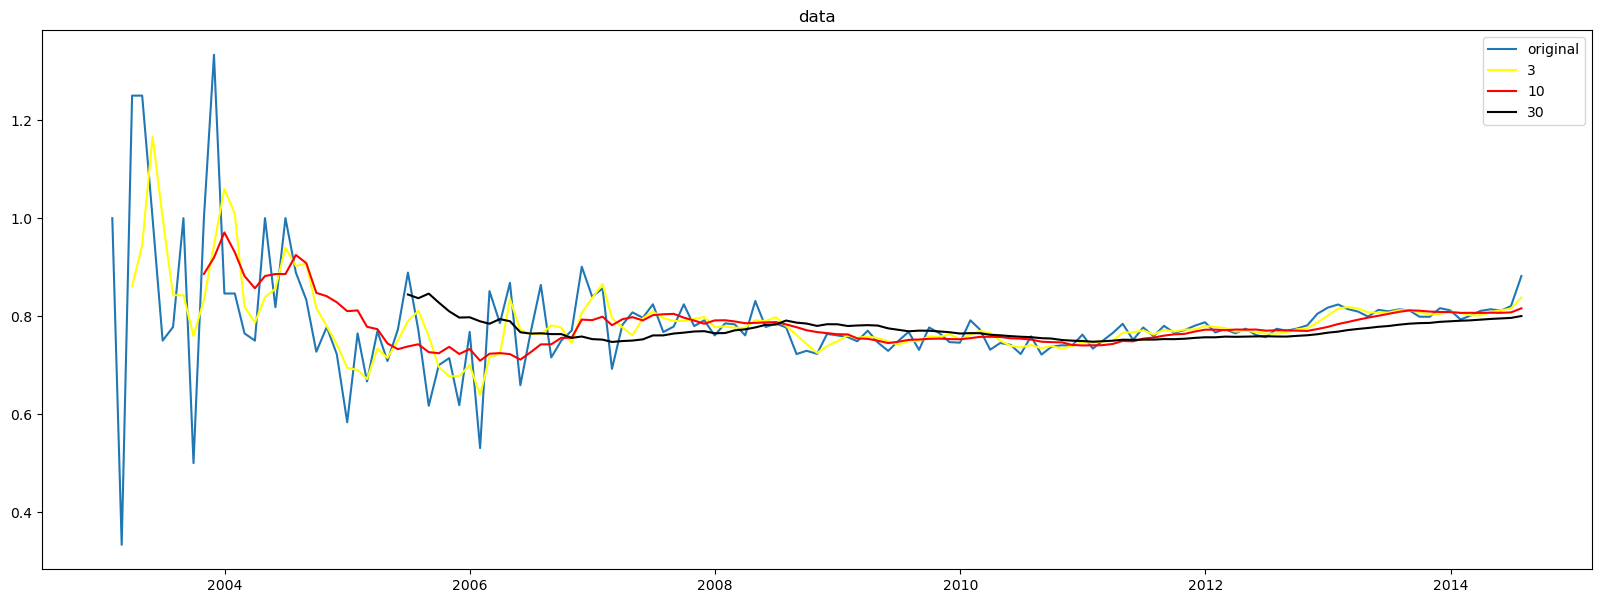

In [32]:
#2. visualizing the data
plt.figure(figsize=(20,7))
plt.plot(sent2.score, label = "original")
plt.plot(sent2.score.rolling(window=3).mean(),label = "3",color = "yellow")
plt.plot(sent2.score.rolling(window=10).mean(), label = "10",color = "red")
plt.plot(sent2.score.rolling(window=30).mean(), label = "30",color = "black")
plt.legend()
plt.title('data')
plt.show()

#### Train test split

In [33]:
sent_data =sent2.dropna()

#Train Test Split
r = int(len(sent_data)*0.80)

train = sent_data[:r]
test = sent_data[r:]
print(len(train),len(test))

111 28


#### Check for stationarity

In [34]:
# ADF test to determine data stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

checkStationarity(train)

'pvalue=1.6593374219771119e-09. Data is Stationary. Proceed to model building'

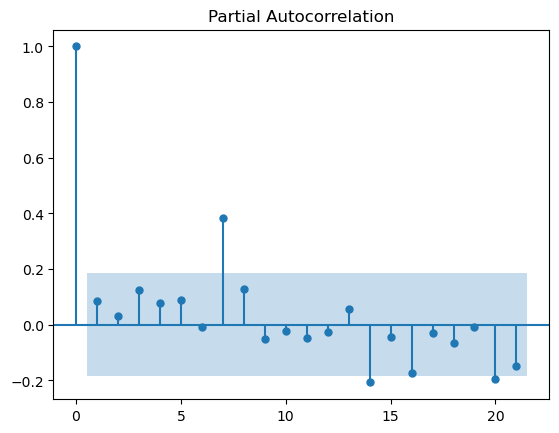

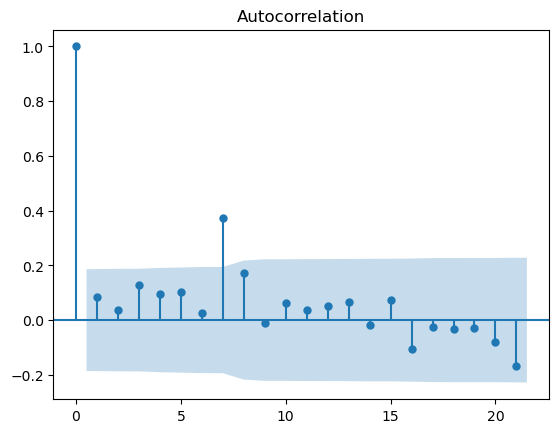

In [35]:
#Partial auto-correlation and Auto-correlation

plot_pacf(train) #p 

plot_acf(train) #q
plt.show()


In [36]:
#Auto arima
k = auto_arima(train, d=0,trace=True)
k

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-146.314, Time=1.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-147.027, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-145.850, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-145.819, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=265.551, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-147.487, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-145.234, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-145.358, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-143.837, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-143.939, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-143.612, Time=0.11 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.953 seconds


ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

#### ARMA Model

In [37]:
#ARMA
p = 1;d =0 ; q= 1

m_arma = ARIMA(train,order=(p,d,q)).fit()
print(m_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  score   No. Observations:                  111
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  75.907
Date:                Mon, 06 Jun 2022   AIC                           -143.814
Time:                        15:30:33   BIC                           -132.975
Sample:                    01-31-2003   HQIC                          -139.417
                         - 03-31-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7838      0.014     55.309      0.000       0.756       0.812
ar.L1         -0.1295      0.891     -0.145      0.884      -1.876       1.617
ma.L1          0.2160      0.843      0.256      0.7

      actual  predicted       err
0   0.774398   0.783811 -0.009413
1   0.761247   0.802147 -0.040900
2   0.756948   0.740945  0.016003
3   0.774243   0.833366 -0.059123
4   0.770099   0.813408 -0.043309
5   0.774631   0.796107 -0.021476
6   0.781141   0.778232  0.002909
7   0.804728   0.784494  0.020234
8   0.817283   0.802352  0.014932
9   0.823760   0.755273  0.068487
10  0.814437   0.808662  0.005775
11  0.809355   0.825947 -0.016593
12  0.798999   0.780100  0.018899
13  0.812786   0.790001  0.022785
14  0.809797   0.780822  0.028974
15  0.813730   0.781533  0.032197
16  0.811830   0.802991  0.008839
17  0.798831   0.782640  0.016191
18  0.798638   0.802752 -0.004114
19  0.816255   0.788804  0.027451
20  0.811785   0.787013  0.024772
21  0.793070   0.778232  0.014838
22  0.800711   0.784494  0.016217
23  0.810680   0.778339  0.032341
24  0.813972   0.767662  0.046310
25  0.811252   0.785647  0.025606
26  0.820547   0.773288  0.047259
27  0.881759   0.784823  0.096936
Fail-to-Reject

Text(0.5, 1.0, 'ARMA Model. Order=(1,0,1)')

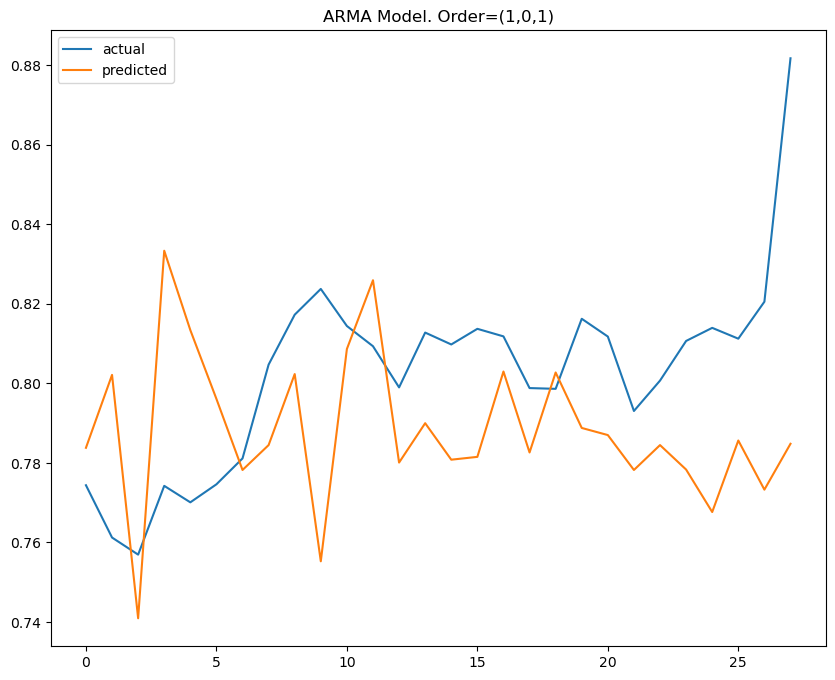

In [38]:
# predictions
predictions = m_arma.predict(0,len(test)-1)
# actual vs predicted values
actual = []; pred_arima = []
#appending
for i in range(0,len(predictions)):
    actual.append(np.array(test)[i][0])
    pred_arima.append(predictions[i])
# Dataframe actual and predicted
df_res = pd.DataFrame({'actual':actual, 'predicted':pred_arima})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m_arma.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")
print()

# RMSE
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))
print()

#Actual and predicted plot
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

#### Seasonal components

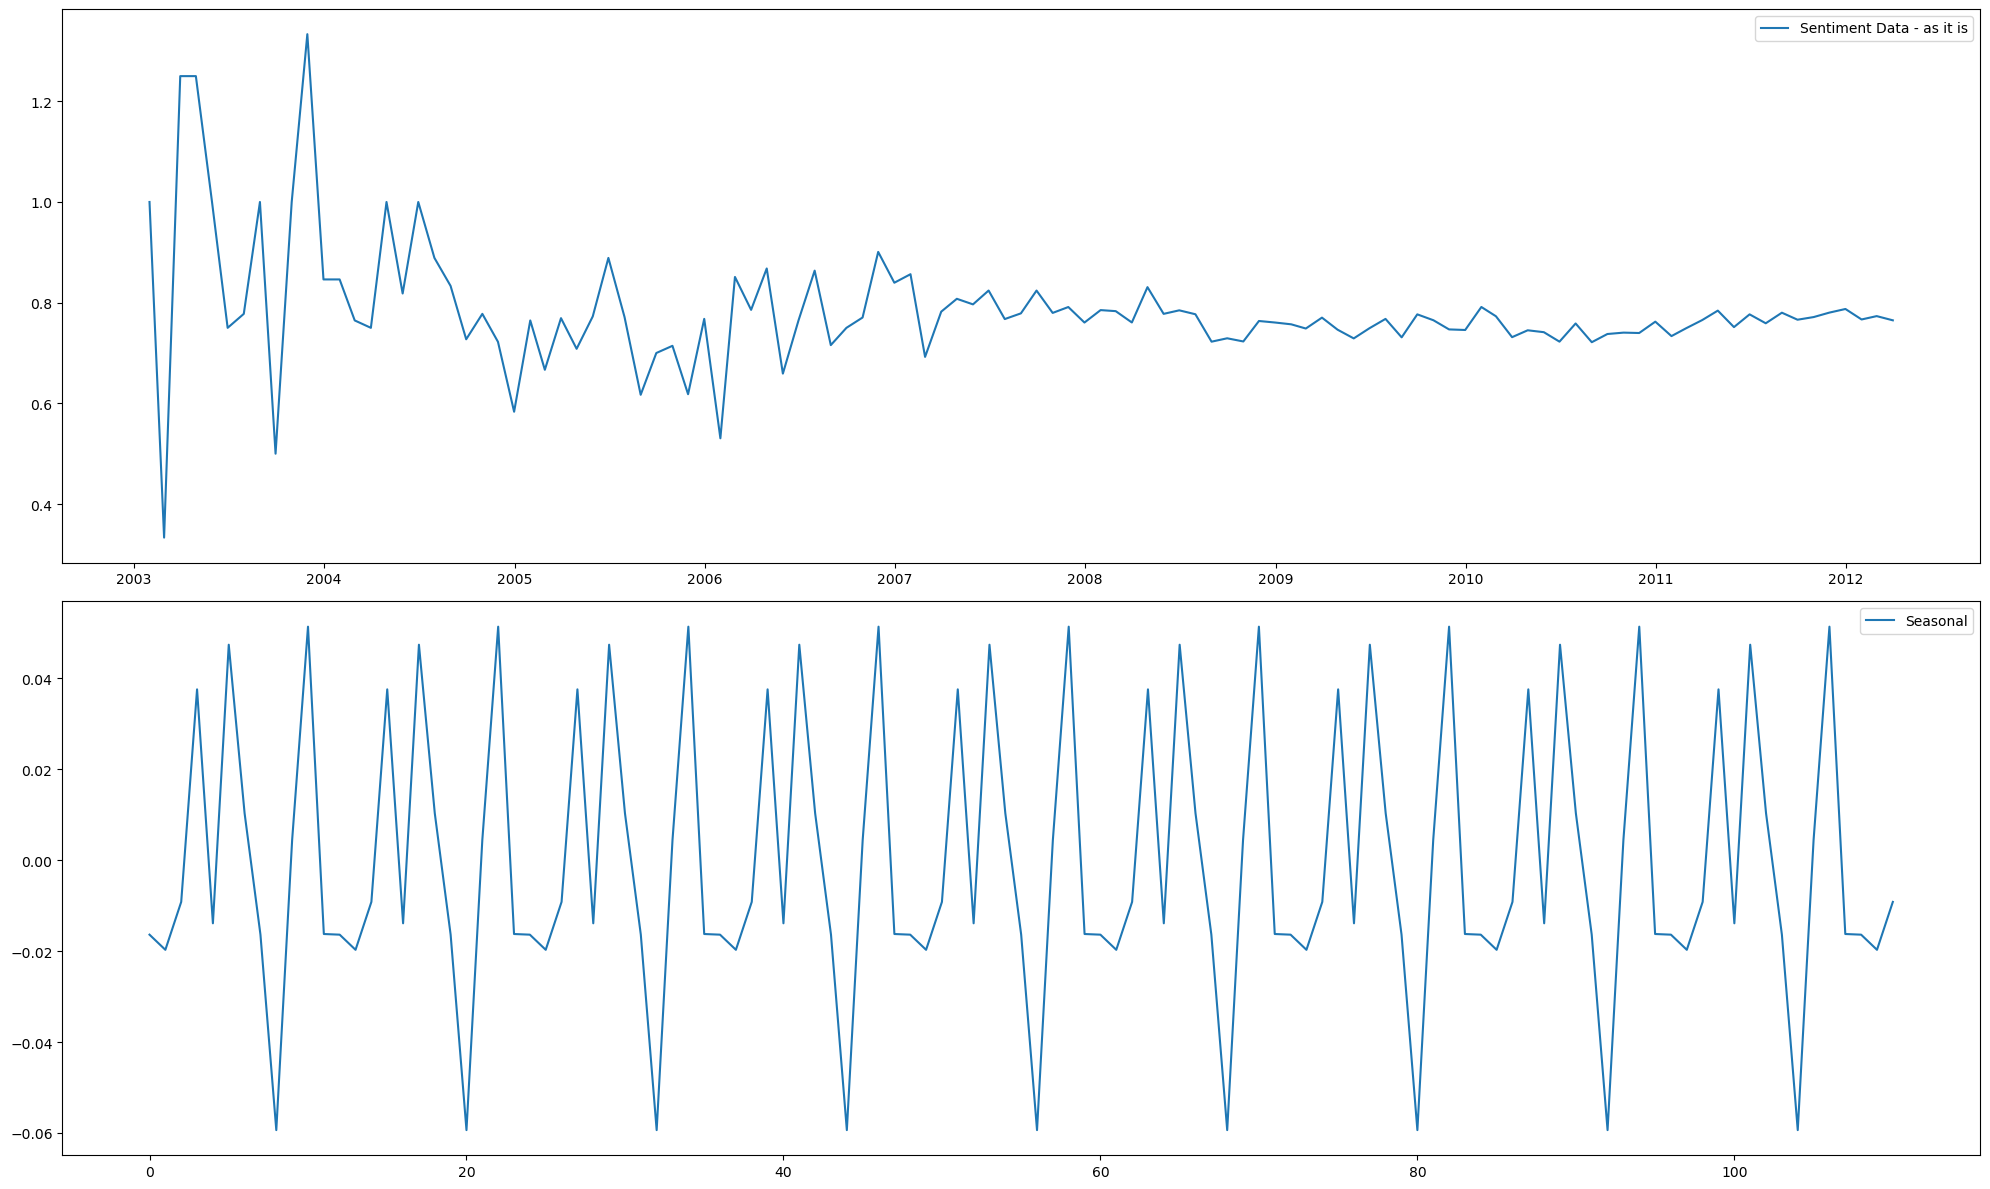

In [39]:
#Seasonal Components
decomposition=seasonal_decompose(np.asarray(train),freq = 12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid
# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(211)
plt.plot(train,label='Sentiment Data - as it is')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')


plt.tight_layout()

#### SARIMA model

      actual  predicted       err
0   0.774398   0.793892 -0.019495
1   0.761247   0.769638 -0.008391
2   0.756948   0.781819 -0.024871
3   0.774243   0.759625  0.014618
4   0.770099   0.797647 -0.027548
5   0.774631   0.762486  0.012145
6   0.781141   0.769181  0.011960
7   0.804728   0.798284  0.006444
8   0.817283   0.805367  0.011917
9   0.823760   0.753417  0.070343
10  0.814437   0.769779  0.044659
11  0.809355   0.784605  0.024750
12  0.798999   0.817742 -0.018744
13  0.812786   0.784828  0.027958
14  0.809797   0.811970 -0.002173
15  0.813730   0.761114  0.052616
16  0.811830   0.836253 -0.024424
17  0.798831   0.776729  0.022102
18  0.798638   0.783991  0.014647
19  0.816255   0.828917 -0.012662
20  0.811785   0.826646 -0.014861
21  0.793070   0.765364  0.027706
22  0.800711   0.780670  0.020041
23  0.810680   0.793849  0.016831
24  0.813972   0.833718 -0.019746
25  0.811252   0.801880  0.009372
26  0.820547   0.828475 -0.007928
27  0.881759   0.762309  0.119451
Reject H0. Bad

Text(0.5, 1.0, 'SARIMA Model. Order=(1,0,1)')

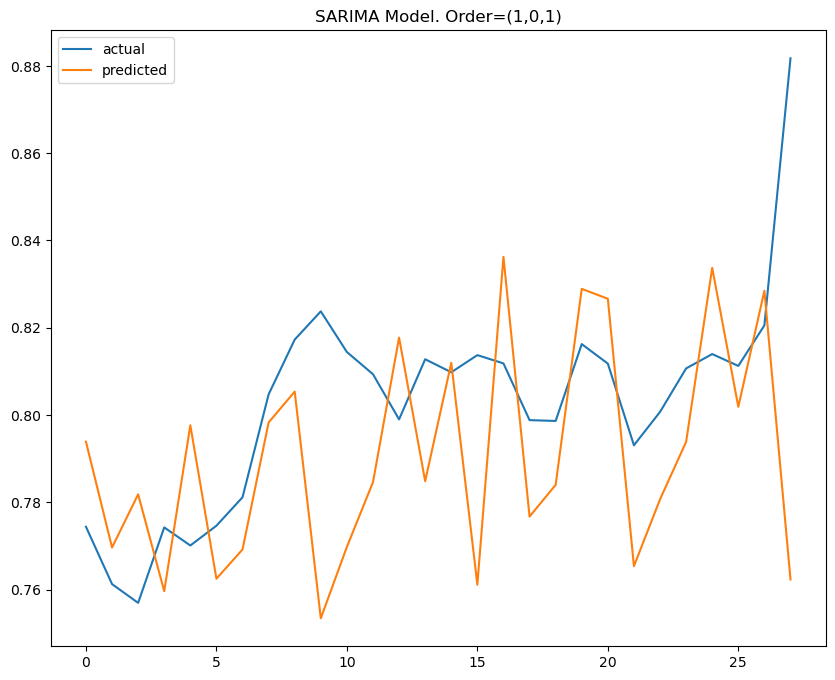

In [40]:
%%time
#SARIMA Model
m_sarima = SARIMAX(train,order=(p,d,q), seasonal_order=(1,2,0,12)).fit() #0,3,1,0,3
m_sarima.summary()

# predictions
predictions = m_sarima.forecast(len(test))
# actual vs predicted values
actual = []; pred_sarima = []
#appending
for i in range(0,len(predictions)):
    actual.append(np.array(test)[i][0])
    pred_sarima.append(predictions[i])
# Dataframe actual and predicted
df_res = pd.DataFrame({'actual':actual, 'predicted':pred_sarima})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m_sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")
print()

# RMSE
msg = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))
print()

#Actual and predicted plot
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

### interpretation: SARIMA model has lesser MSE and RMSE. Hence used for forecasting

#### Sentiment forecasting using SARIMA model

In [41]:
m_final = SARIMAX(sent_data,order=(p,d,q), seasonal_order=(1,2,0,12)).fit() #0,3,1,0,3
m_final.forecast(12)

2014-08-31    0.833420
2014-09-30    0.806465
2014-10-31    0.818406
2014-11-30    0.829380
2014-12-31    0.831088
2015-01-31    0.807595
2015-02-28    0.821509
2015-03-31    0.833140
2015-04-30    0.837056
2015-05-31    0.837283
2015-06-30    0.856989
2015-07-31    0.932007
Freq: M, Name: predicted_mean, dtype: float64

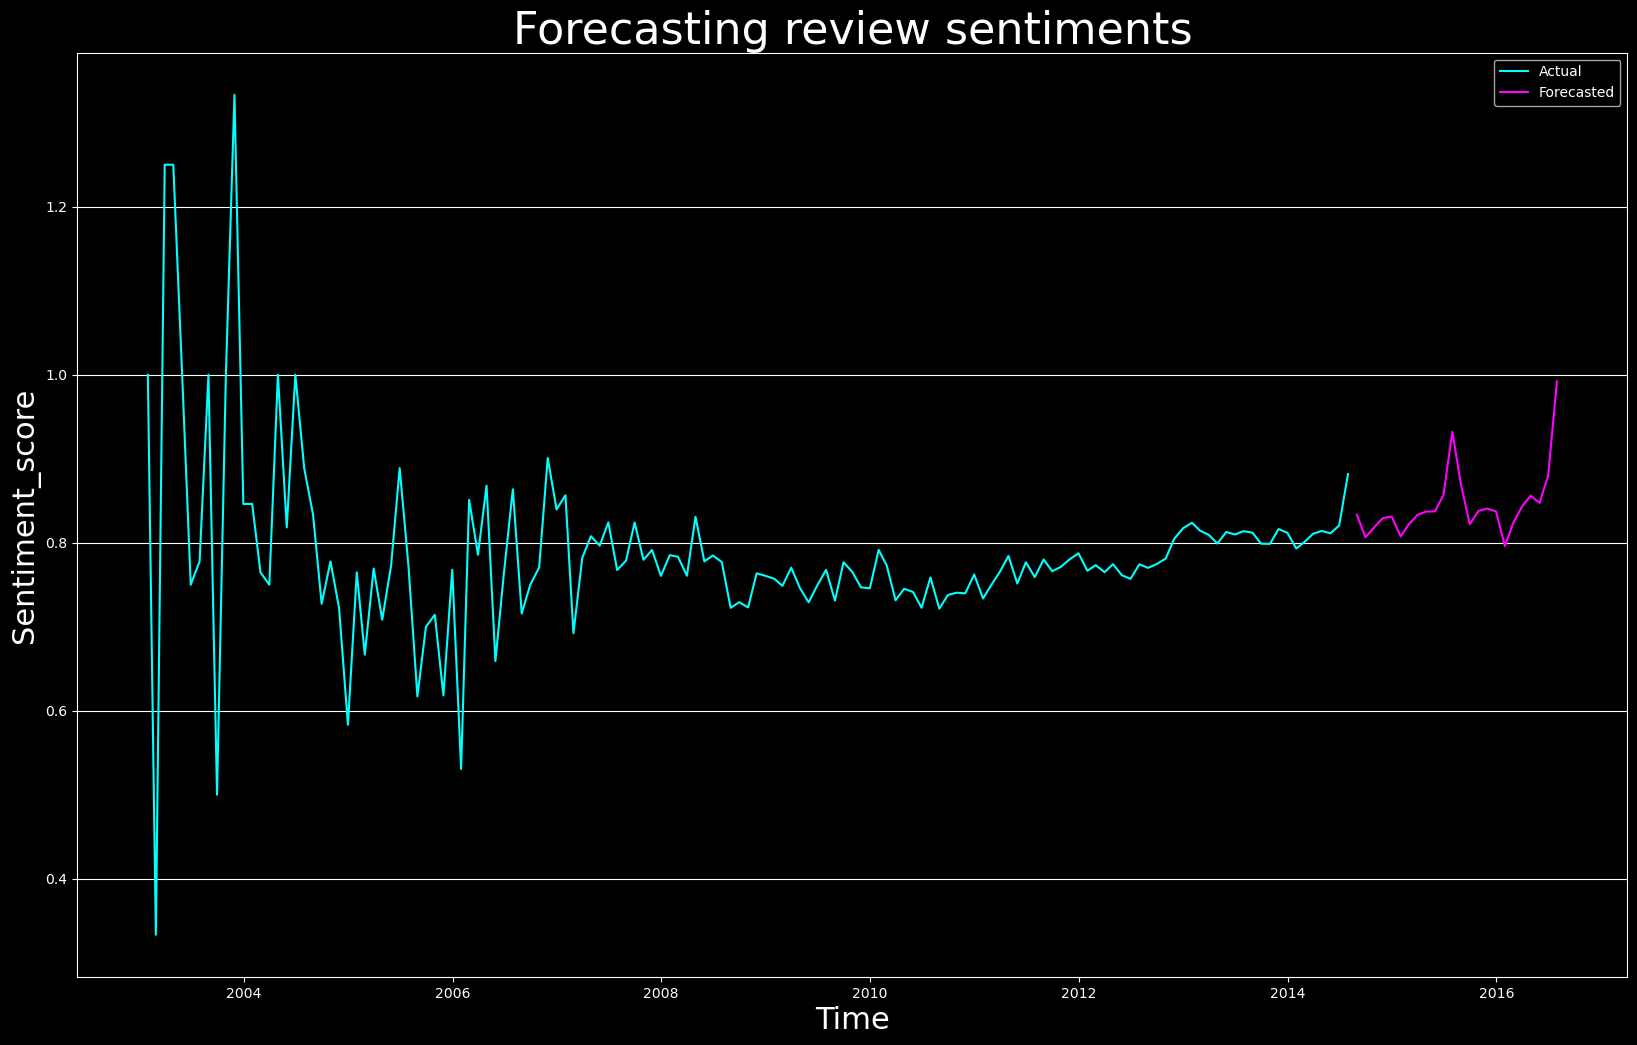

In [42]:
plt.style.use("dark_background")

plt.figure(figsize = (20,12))
plt.plot(sent2,c = "cyan", label = "Actual")
plt.plot(m_final.forecast(24), c = "magenta", label = "Forecasted") #forecast for next 24 months
plt.xlabel("Time", fontsize=22)
plt.ylabel("Sentiment_score", fontsize=22)
plt.title("Forecasting review sentiments", fontsize = 32)
plt.grid(axis = 'y')
plt.legend()
plt.show()

## Health Category   - Sentiment forecasting

In [43]:
health = data[data["Category"] == "Health"].reset_index(drop = True)
health.head()

,Unnamed: 0,reviewerID,asin,Date,Category,review,sentiment,score
0,291818,ALC5GH8CAMAI7,159985130X,2011-01-05,Health,great little gadget ve look sprinter use light...,positive,1
1,291819,AHKSURW85PJUE,159985130X,2012-02-18,Health,recommend travel magnifier occasional readingi...,positive,1
2,291820,A38RMU1Y5TDP9,159985130X,2010-06-08,Health,like quality lens build light lens thiscernibl...,positive,1
3,291821,A1XZUG7DFXXOS4,159985130X,2008-02-08,Health,love great point light pocket magnifier work g...,positive,1
4,291822,A1MS3M7M7AM13X,159985130X,2011-08-16,Health,nice pull magnifier want light come slide reco...,positive,1


In [44]:
dfh = health[["Date", "score"]].sort_values(by = "Date", ascending = True).set_index("Date")
dfh.head()

,score
Date,
2000-12-09,0
2000-12-12,1
2001-01-13,0
2001-03-29,1
2001-04-30,1


In [45]:
dfh = dfh.resample("M").mean()
dfh = dfh.dropna()
len(dfh), dfh.head()

(157,
             score
 Date             
 2000-12-31    0.5
 2001-01-31    0.0
 2001-03-31    1.0
 2001-04-30    1.0
 2001-07-31    1.0)

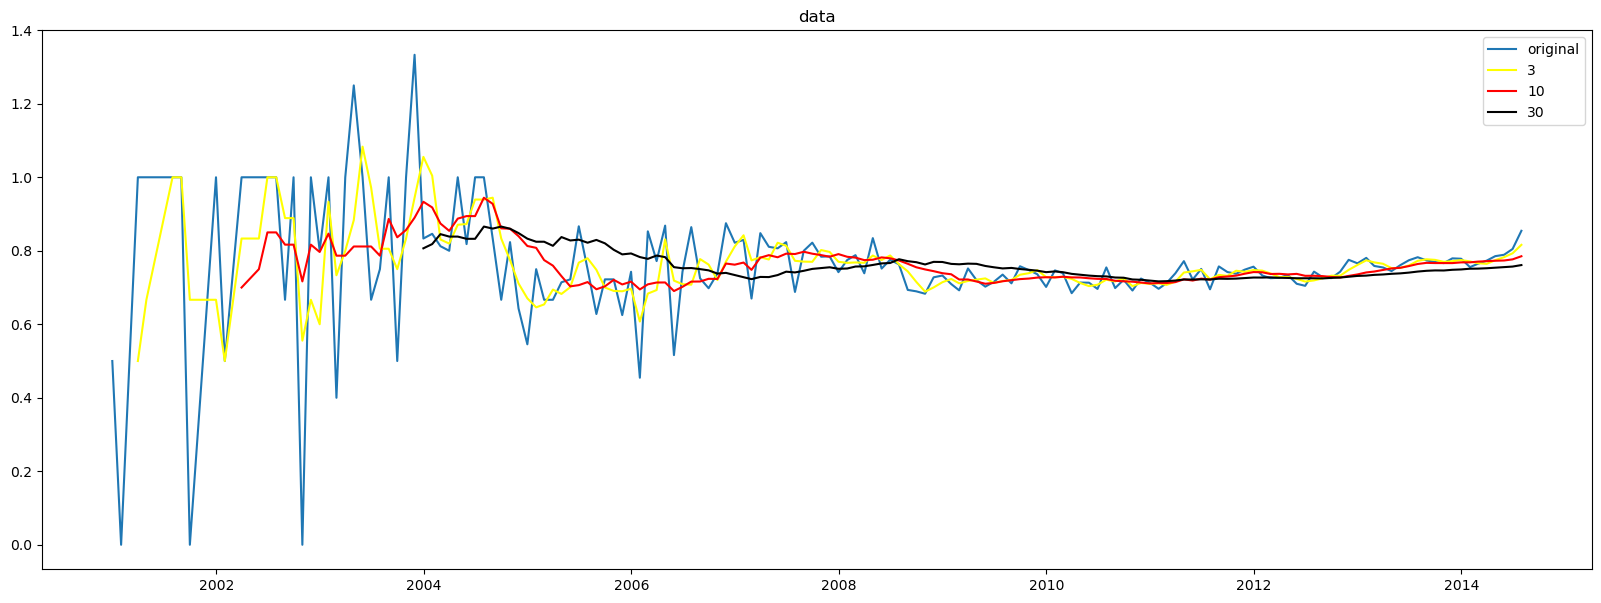

In [46]:
plt.style.use("default")
plt.figure(figsize=(20,7))
plt.plot(dfh.score, label = "original")
plt.plot(dfh.score.rolling(window=3).mean(),label = "3",color = "yellow")
plt.plot(dfh.score.rolling(window=10).mean(), label = "10",color = "red")
plt.plot(dfh.score.rolling(window=30).mean(), label = "30",color = "black")
plt.legend()
plt.title('data')
plt.show()

In [47]:
#Smoothing the data
health_data = dfh.rolling(window = 10).mean()
health_data = health_data.dropna()
health_data.head()

,score
Date,
2002-03-31,0.700000
2002-05-31,0.750000
2002-06-30,0.850000
2002-07-31,0.850000
2002-08-31,0.816667


In [48]:
#Train Test Split
h = int(len(health_data)*0.80)

trainh = health_data[:h]
testh = health_data[h:]
print(len(trainh),len(testh))

118 30


In [49]:
checkStationarity(trainh)

'pvalue=0.3295660246350113. Data is not Stationary. Make the data stationary before model building'

In [50]:
diff_health = trainh.diff()
diff_health = diff_health.dropna()
checkStationarity(diff_health)

'pvalue=0.02014769386101328. Data is Stationary. Proceed to model building'

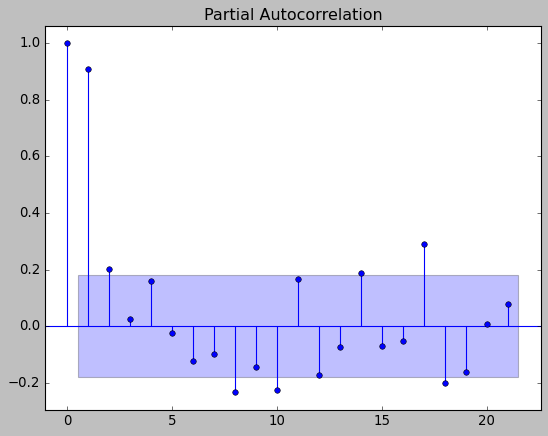

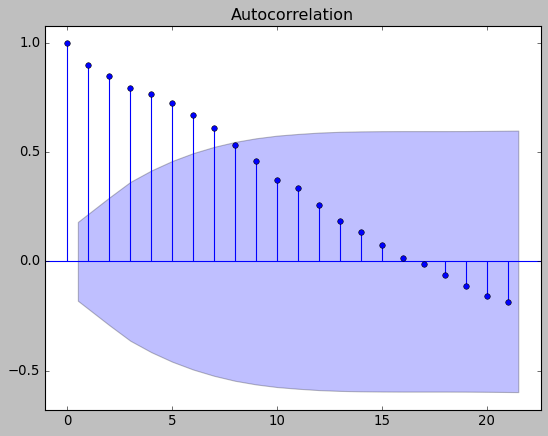

In [51]:
#Partial auto-correlation and Auto-correlation
plt.style.use("classic")

plot_pacf(trainh) #p 

plot_acf(trainh) #q
plt.show()

In [52]:
#Auto arima
k = auto_arima(trainh, d=1,trace=True)
k

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-515.009, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-517.272, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-519.940, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-519.732, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-519.250, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-518.100, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-518.229, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-516.647, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-521.917, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-520.074, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-520.618, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-521.716, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-518.621, Time=0.22 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.847 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [53]:
#ARMA
p = 1;d =1 ; q= 0

m_arma = ARIMA(trainh,order=(p,d,q)).fit()
print(m_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  score   No. Observations:                  118
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 262.958
Date:                Mon, 06 Jun 2022   AIC                           -521.917
Time:                        15:30:44   BIC                           -516.392
Sample:                             0   HQIC                          -519.674
                                - 118                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1955      0.057     -3.451      0.001      -0.307      -0.084
sigma2         0.0007   4.31e-05     15.169      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.01   Jarque-

      actual  predicted       err
0   0.736832   0.816927 -0.080095
1   0.737305   0.961259 -0.223955
2   0.735646   0.872751 -0.137105
3   0.737149   0.843249 -0.106100
4   0.731868   0.754741 -0.022873
5   0.731972   0.754741 -0.022769
6   0.730999   0.754741 -0.023743
7   0.728701   0.666233  0.062468
8   0.727324   0.666233  0.061090
9   0.731591   0.683935  0.047656
10  0.735635   0.683935  0.051700
11  0.741039   0.654432  0.086607
12  0.743508   0.742940  0.000568
13  0.747939   0.772443 -0.024503
14  0.751954   0.860950 -0.108996
15  0.753726   0.816697 -0.062970
16  0.758375   0.873594 -0.115219
17  0.764063   0.846361 -0.082298
18  0.767151   0.810958 -0.043808
19  0.766560   0.794100 -0.027540
20  0.766610   0.766441  0.000169
21  0.766480   0.782327 -0.015847
22  0.768442   0.768710 -0.000268
23  0.768543   0.756909  0.011634
24  0.770529   0.756909  0.013619
25  0.771754   0.784568 -0.012814
26  0.772868   0.803970 -0.031102
27  0.773537   0.803041 -0.029504
28  0.776642  

Text(0.5, 1.0, 'ARIMA Model. Order=(1,0,0)')

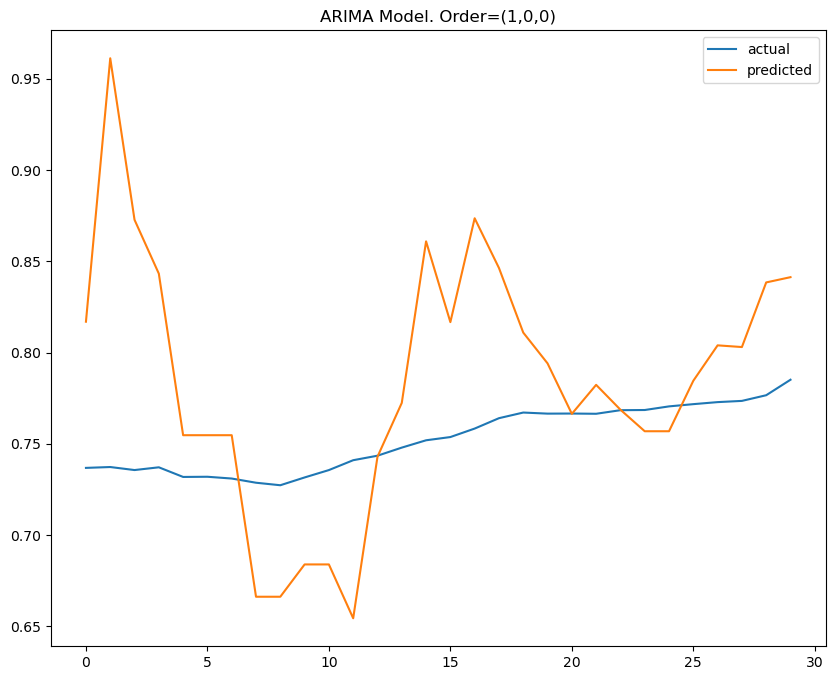

In [74]:
plt.style.use("default")
# predictions
predictions = m_arma.predict(0,len(testh)-1)
# actual vs predicted values
actual = []; pred_arima = []
#appending
for i in range(0,len(predictions)):
    actual.append(np.array(testh)[i][0])
    pred_arima.append(predictions[i])
# Dataframe actual and predicted
df_res = pd.DataFrame({'actual':actual, 'predicted':pred_arima})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m_arma.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")
print()

# RMSE
msg = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))
print()

#Actual and predicted plot
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

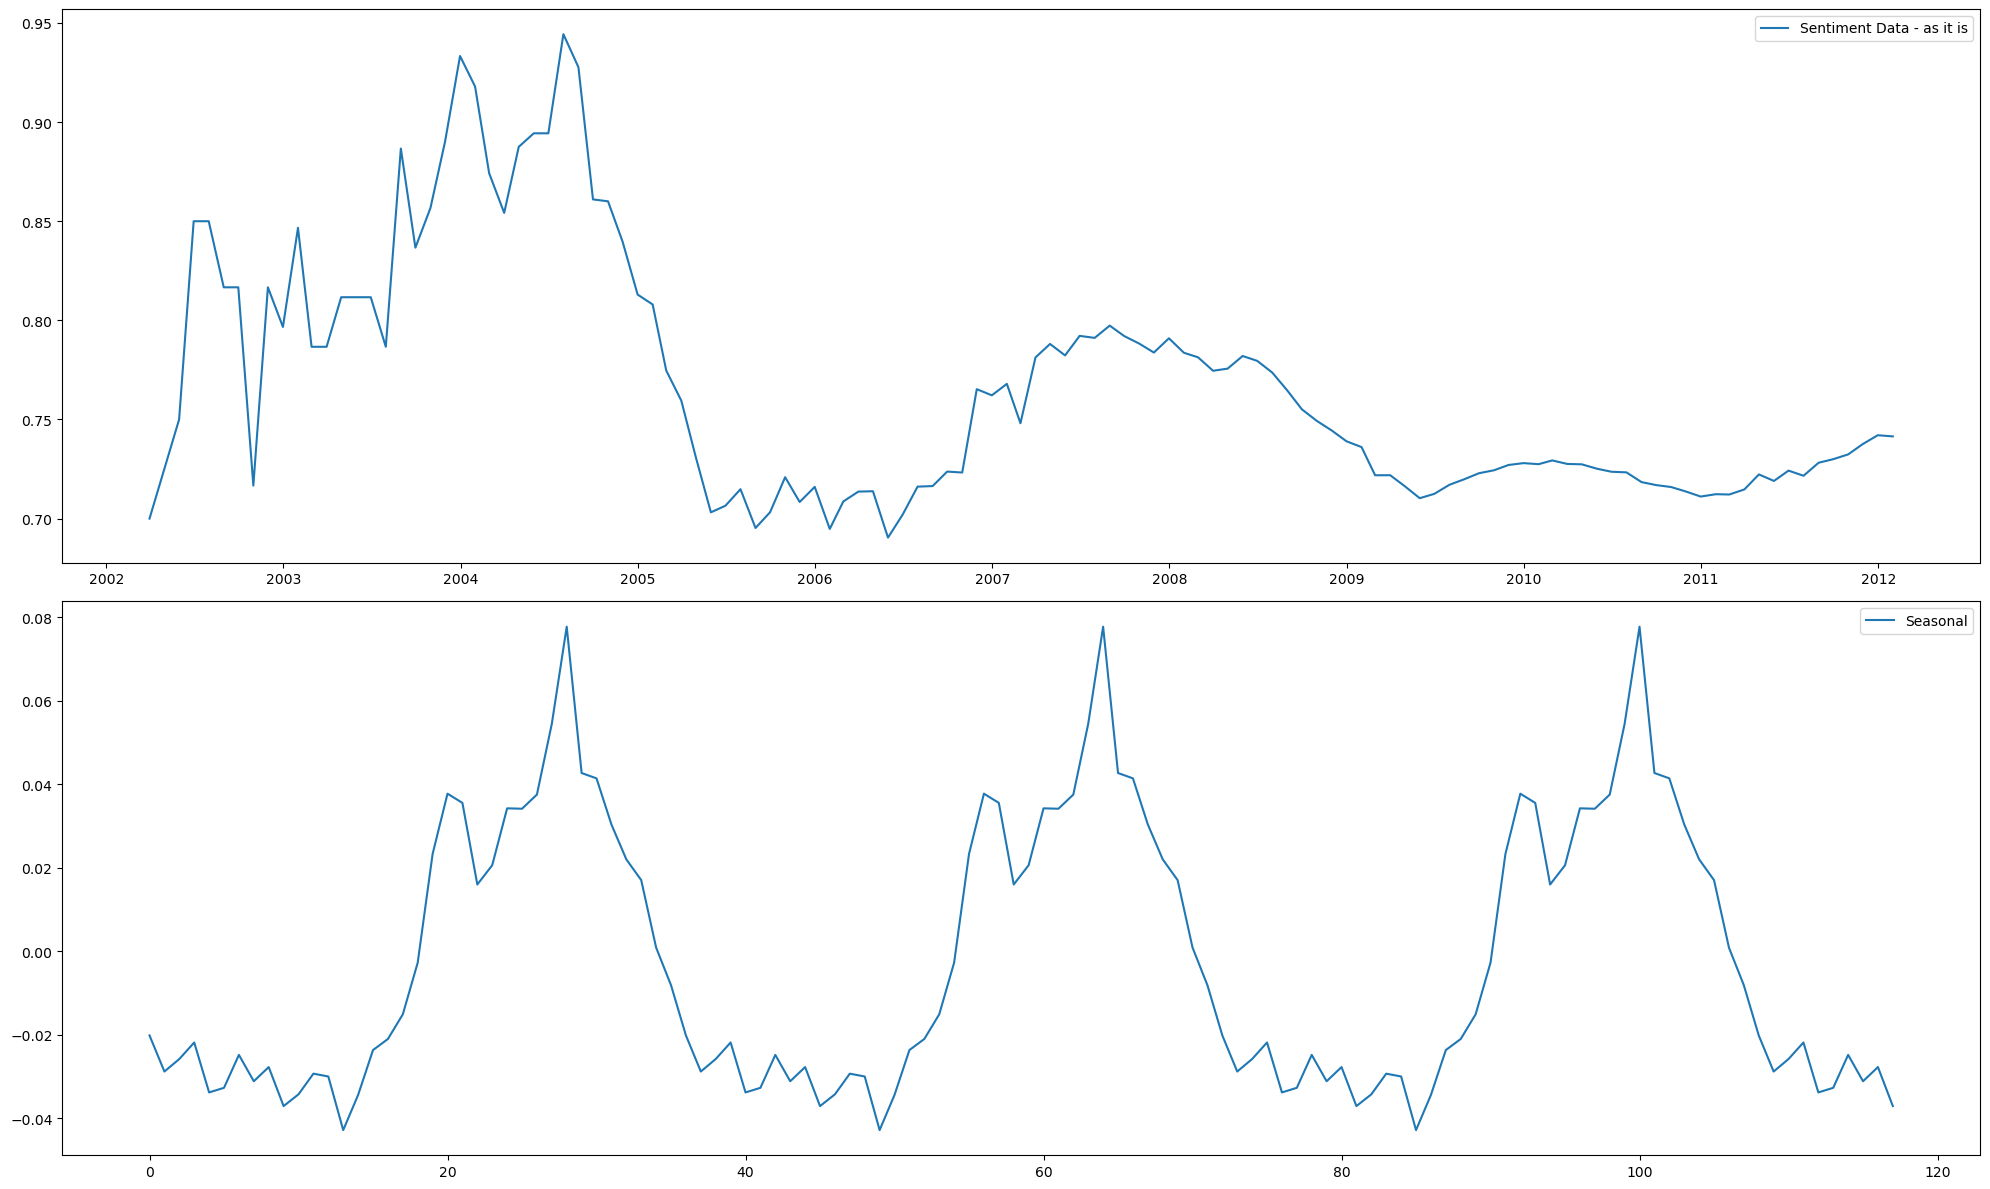

In [75]:
#Seasonal Components
decomposition=seasonal_decompose(np.asarray(trainh),freq = 36)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid
# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(211)
plt.plot(trainh,label='Sentiment Data - as it is')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')


plt.tight_layout()

      actual  predicted       err
0   0.736832   0.740686 -0.003854
1   0.737305   0.739558 -0.002254
2   0.735646   0.741843 -0.006197
3   0.737149   0.737801 -0.000652
4   0.731868   0.738445 -0.006577
5   0.731972   0.735879 -0.003907
6   0.730999   0.735701 -0.004703
7   0.728701   0.734894 -0.006192
8   0.727324   0.734747 -0.007423
9   0.731591   0.735442 -0.003851
10  0.735635   0.735645 -0.000010
11  0.741039   0.735250  0.005789
12  0.743508   0.734148  0.009361
13  0.747939   0.734269  0.013670
14  0.751954   0.738645  0.013309
15  0.753726   0.734483  0.019243
16  0.758375   0.736938  0.021437
17  0.764063   0.733933  0.030130
18  0.767151   0.736724  0.030426
19  0.766560   0.736842  0.029718
20  0.766610   0.737644  0.028966
21  0.766480   0.740276  0.026204
22  0.768442   0.742321  0.026121
23  0.768543   0.741559  0.026984
24  0.770529   0.740372  0.030156
25  0.771754   0.739644  0.032109
26  0.772868   0.742769  0.030100
27  0.773537   0.738473  0.035064
28  0.776642  

Text(0.5, 1.0, 'SARIMA Model. Order=(1,0,0)')

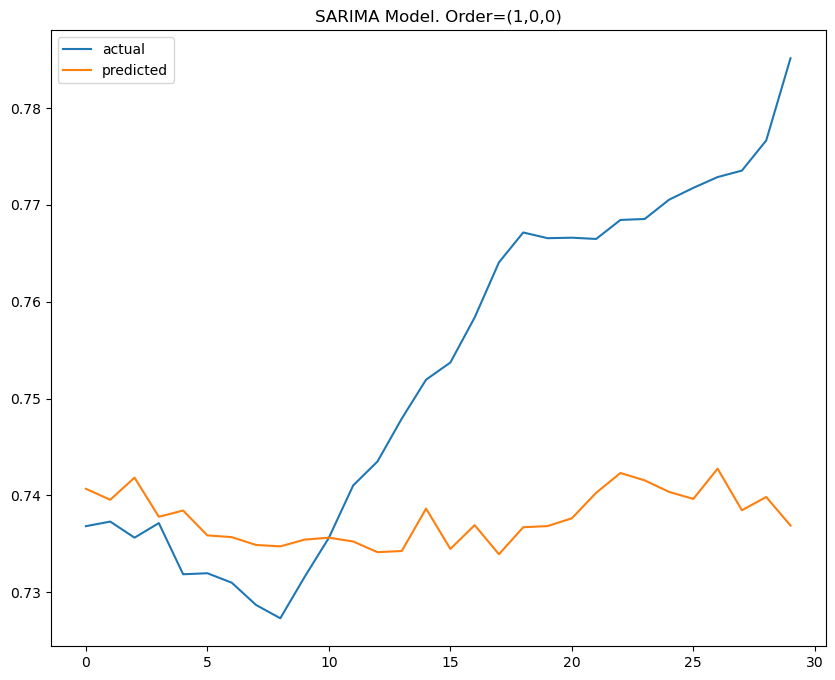

In [76]:
%%time
#SARIMA Model
m_sarima = SARIMAX(trainh,order=(p,d,q), seasonal_order=(1,1,0,12)).fit() #0,3,1,0,3
m_sarima.summary()

# predictions
predictions = np.array(m_sarima.forecast(len(testh)))
# actual vs predicted values
actual = []; pred_sarima = []
#appending
for i in range(0,len(predictions)):
    actual.append(np.array(testh)[i][0])
    pred_sarima.append(predictions[i])
# Dataframe actual and predicted
df_res = pd.DataFrame({'actual':actual, 'predicted':pred_sarima})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m_sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")
print()

# RMSE
msg = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))
print()

#Actual and predicted plot
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

In [57]:
#Forecasting sentiments of health for next year
m_finalh = SARIMAX(health_data,order=(p,d,q), seasonal_order=(1,1,0,12)).fit()
ind = [m_final.forecast(24).index]  # Getting date index from previous forecast
health_for = m_finalh.forecast(24)
health_for.index = ind
dex = []
for i in health_for.index:
    dex.append(pd.to_datetime(i)[0])
health_for.index = dex
health_for

2014-08-31    0.784725
2014-09-30    0.783600
2014-10-31    0.782829
2014-11-30    0.784987
2014-12-31    0.788017
2015-01-31    0.790853
2015-02-28    0.793088
2015-03-31    0.795965
2015-04-30    0.798575
2015-05-31    0.799813
2015-06-30    0.803713
2015-07-31    0.810759
2015-08-31    0.812154
2015-09-30    0.811304
2015-10-31    0.810956
2015-11-30    0.811935
2015-12-31    0.814414
2016-01-31    0.815840
2016-02-29    0.817946
2016-03-31    0.819972
2016-04-30    0.821811
2016-05-31    0.822756
2016-06-30    0.826246
2016-07-31    0.834036
Name: predicted_mean, dtype: float64

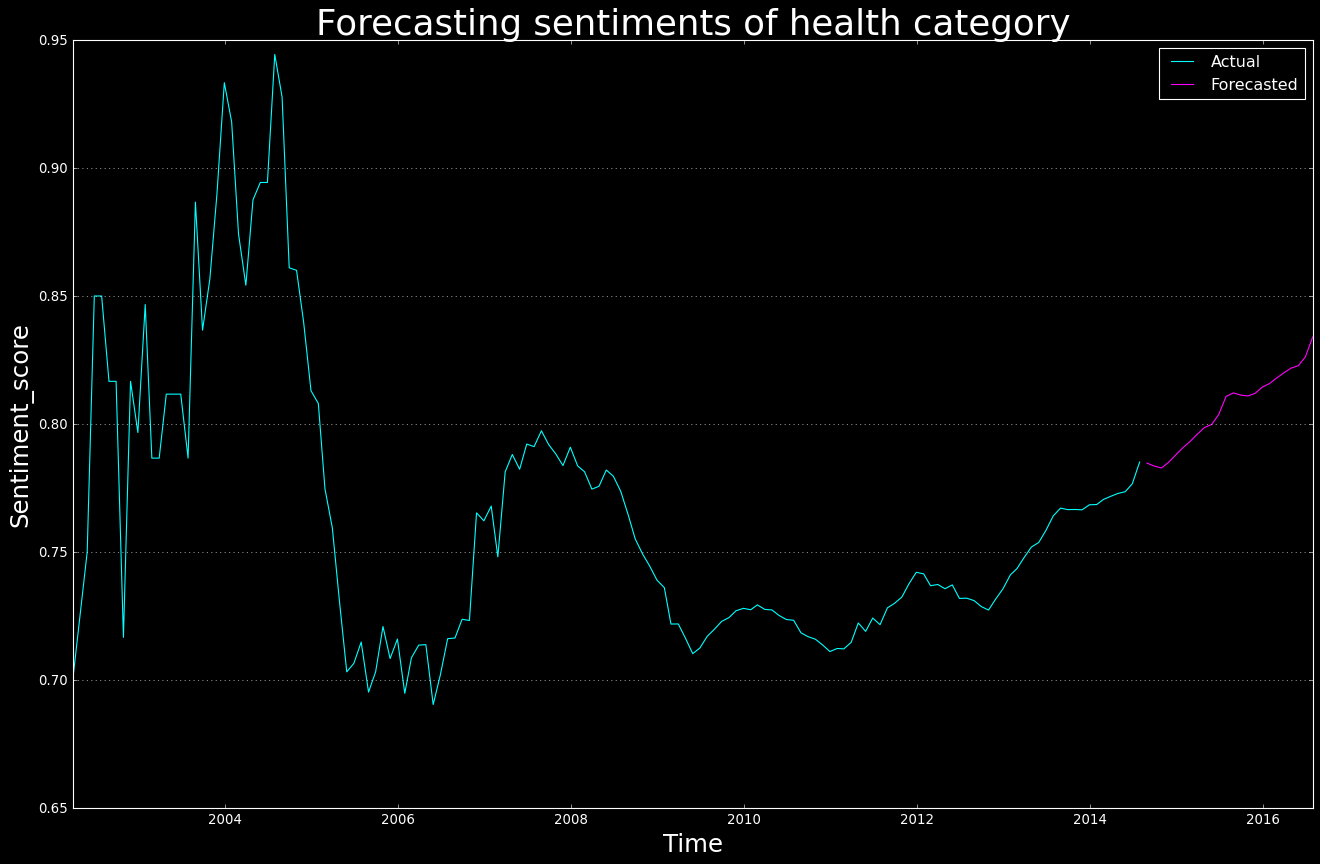

In [58]:
plt.style.use("dark_background")

plt.figure(figsize = (20,12))
plt.plot(health_data,c = "cyan", label = "Actual")
plt.plot(health_for, c = "magenta", label = "Forecasted") #forecast for next 24 months
plt.xlabel("Time", fontsize=22)
plt.ylabel("Sentiment_score", fontsize=22)
plt.title("Forecasting sentiments of health category", fontsize = 32)
plt.grid(axis = 'y')
plt.legend()
plt.show()

## Sports category - Sentiment forecasting

In [59]:
sports = data[data["Category"] == "Sports"].reset_index(drop = True)
sports.head()

,Unnamed: 0,reviewerID,asin,Date,Category,review,sentiment,score
0,0,AIXZKN4ACSKI,1881509818,2014-01-26,Sports,come time happy make take pin block easy work ...,strongly positive,2
1,1,A1L5P841VIO02V,1881509818,2012-02-02,Sports,factory block tool block ve lose need ve ghost...,positive,1
2,2,AB2W04NI4OEAD,1881509818,2012-02-28,Sports,nt punch like block bag okay butt end handy pu...,positive,1
3,3,A148SVSWKTJKU6,1881509818,2012-02-05,Sports,work well punch find hardware store actually t...,neutral,0
4,4,AAAWJ6LW9WMOO,1881509818,2013-04-23,Sports,purchase thinking maybe need special tool easi...,neutral,0


In [60]:
dfs = sports[["Date", "score"]].sort_values(by = "Date", ascending = True).set_index("Date")
dfs.head()

,score
Date,
2002-03-07,1
2002-09-03,1
2002-09-20,1
2002-11-28,1
2003-01-12,1


In [61]:
dfs = dfs.resample("M").mean()
dfs = dfs.dropna()
len(dfs), dfs.head()

(131,
             score
 Date             
 2002-03-31    1.0
 2002-09-30    1.0
 2002-11-30    1.0
 2003-01-31    1.0
 2003-02-28    0.0)

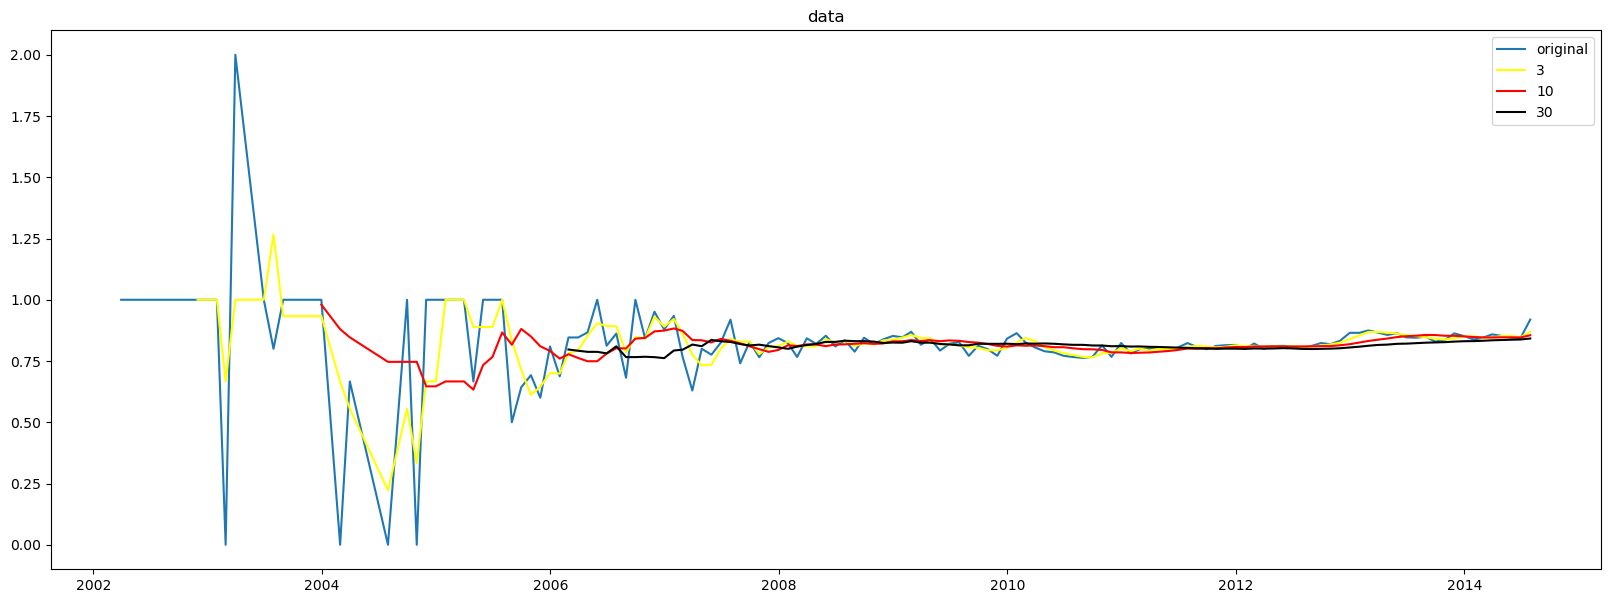

In [62]:
plt.style.use("default")

plt.figure(figsize=(20,7))
plt.plot(dfs.score, label = "original")
plt.plot(dfs.score.rolling(window=3).mean(),label = "3",color = "yellow")
plt.plot(dfs.score.rolling(window=10).mean(), label = "10",color = "red")
plt.plot(dfs.score.rolling(window=30).mean(), label = "30",color = "black")
plt.legend()
plt.title('data')
plt.show()

In [63]:
#Smoothing the data
sports_data = dfs.rolling(window = 10).mean()
sports_data = sports_data.dropna()
sports_data.head()

,score
Date,
2003-12-31,0.980000
2004-02-29,0.880000
2004-03-31,0.846667
2004-07-31,0.746667
2004-09-30,0.746667


In [64]:
#Train Test Split
s = int(len(sports_data)*0.80)

trains = sports_data[:s]
tests = sports_data[s:]
print(len(trains),len(tests))

97 25


In [65]:
checkStationarity(trains)

'pvalue=0.001725166496922986. Data is Stationary. Proceed to model building'

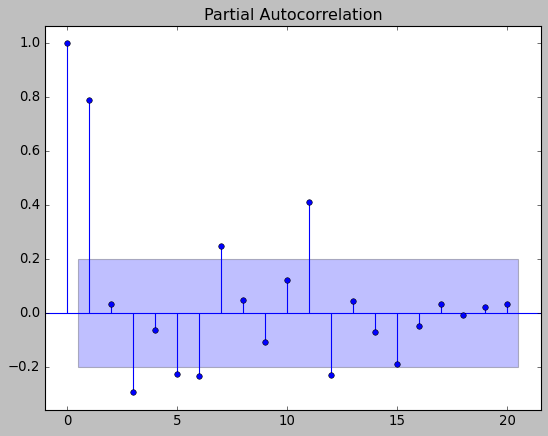

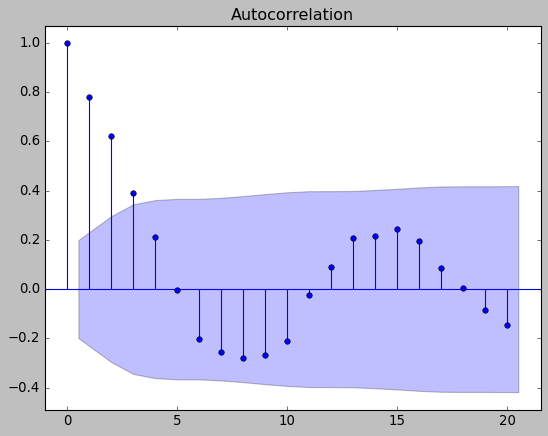

In [66]:
#Partial auto-correlation and Auto-correlation
plt.style.use("classic")
plot_pacf(trains) #p 

plot_acf(trains) #q
plt.show()

In [67]:
#Auto arima
k = auto_arima(trains, d=0,trace=True)
k

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-276.514, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-304.410, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-418.825, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-360.161, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=235.458, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-417.934, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-417.365, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-415.673, Time=0.38 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.508 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [68]:
#ARMA
p = 1;d =0 ; q= 0

m_arma = ARIMA(trains,order=(p,d,q)).fit()
print(m_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  score   No. Observations:                   97
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 212.413
Date:                Mon, 06 Jun 2022   AIC                           -418.825
Time:                        15:30:50   BIC                           -411.101
Sample:                             0   HQIC                          -415.702
                                 - 97                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8169      0.017     47.679      0.000       0.783       0.851
ar.L1          0.8851      0.025     35.693      0.000       0.836       0.934
sigma2         0.0007    5.2e-05     13.876      0.0

      actual  predicted       err
0   0.809916   0.816927 -0.007011
1   0.809913   0.961259 -0.151346
2   0.810773   0.872751 -0.061978
3   0.811062   0.843249 -0.032187
4   0.814417   0.754741  0.059676
5   0.818795   0.754741  0.064054
6   0.825359   0.754741  0.070617
7   0.831742   0.666233  0.165509
8   0.837163   0.666233  0.170930
9   0.841838   0.683935  0.157903
10  0.847758   0.683935  0.163823
11  0.851247   0.654432  0.196815
12  0.853448   0.742940  0.110508
13  0.856516   0.772443  0.084073
14  0.856133   0.860950 -0.004817
15  0.853148   0.816697  0.036452
16  0.852927   0.873594 -0.020667
17  0.850633   0.846361  0.004272
18  0.847823   0.810958  0.036865
19  0.846596   0.794100  0.052496
20  0.846157   0.766441  0.079716
21  0.846768   0.782327  0.064441
22  0.846790   0.768710  0.078080
23  0.846276   0.756909  0.089366
24  0.855266   0.756909  0.098357
Fail-to-Reject H0. Good model

ARIMA Model. Order=(1,0,0)
	MSE = 0.009882287597318764
	RMSE = 0.09940969569070597



Text(0.5, 1.0, 'ARIMA Model. Order=(1,0,0)')

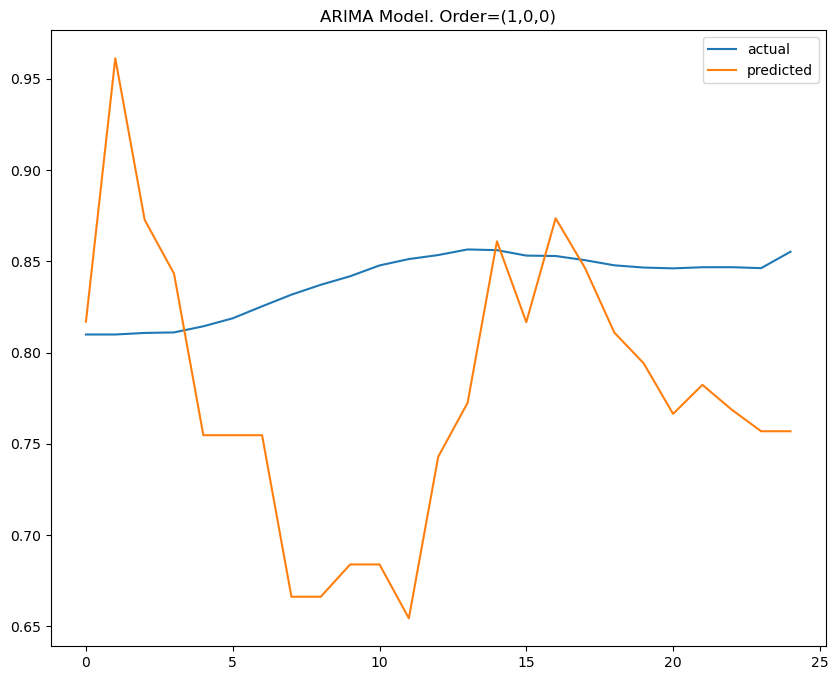

In [69]:
plt.style.use("default")
# predictions
predictions = m_arma.predict(0,len(tests)-1)
# actual vs predicted values
actual = []; pred_arima = []
#appending
for i in range(0,len(predictions)):
    actual.append(np.array(tests)[i][0])
    pred_arima.append(predictions[i])
# Dataframe actual and predicted
df_res = pd.DataFrame({'actual':actual, 'predicted':pred_arima})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m_arma.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")
print()

# RMSE
msg = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))
print()

#Actual and predicted plot
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

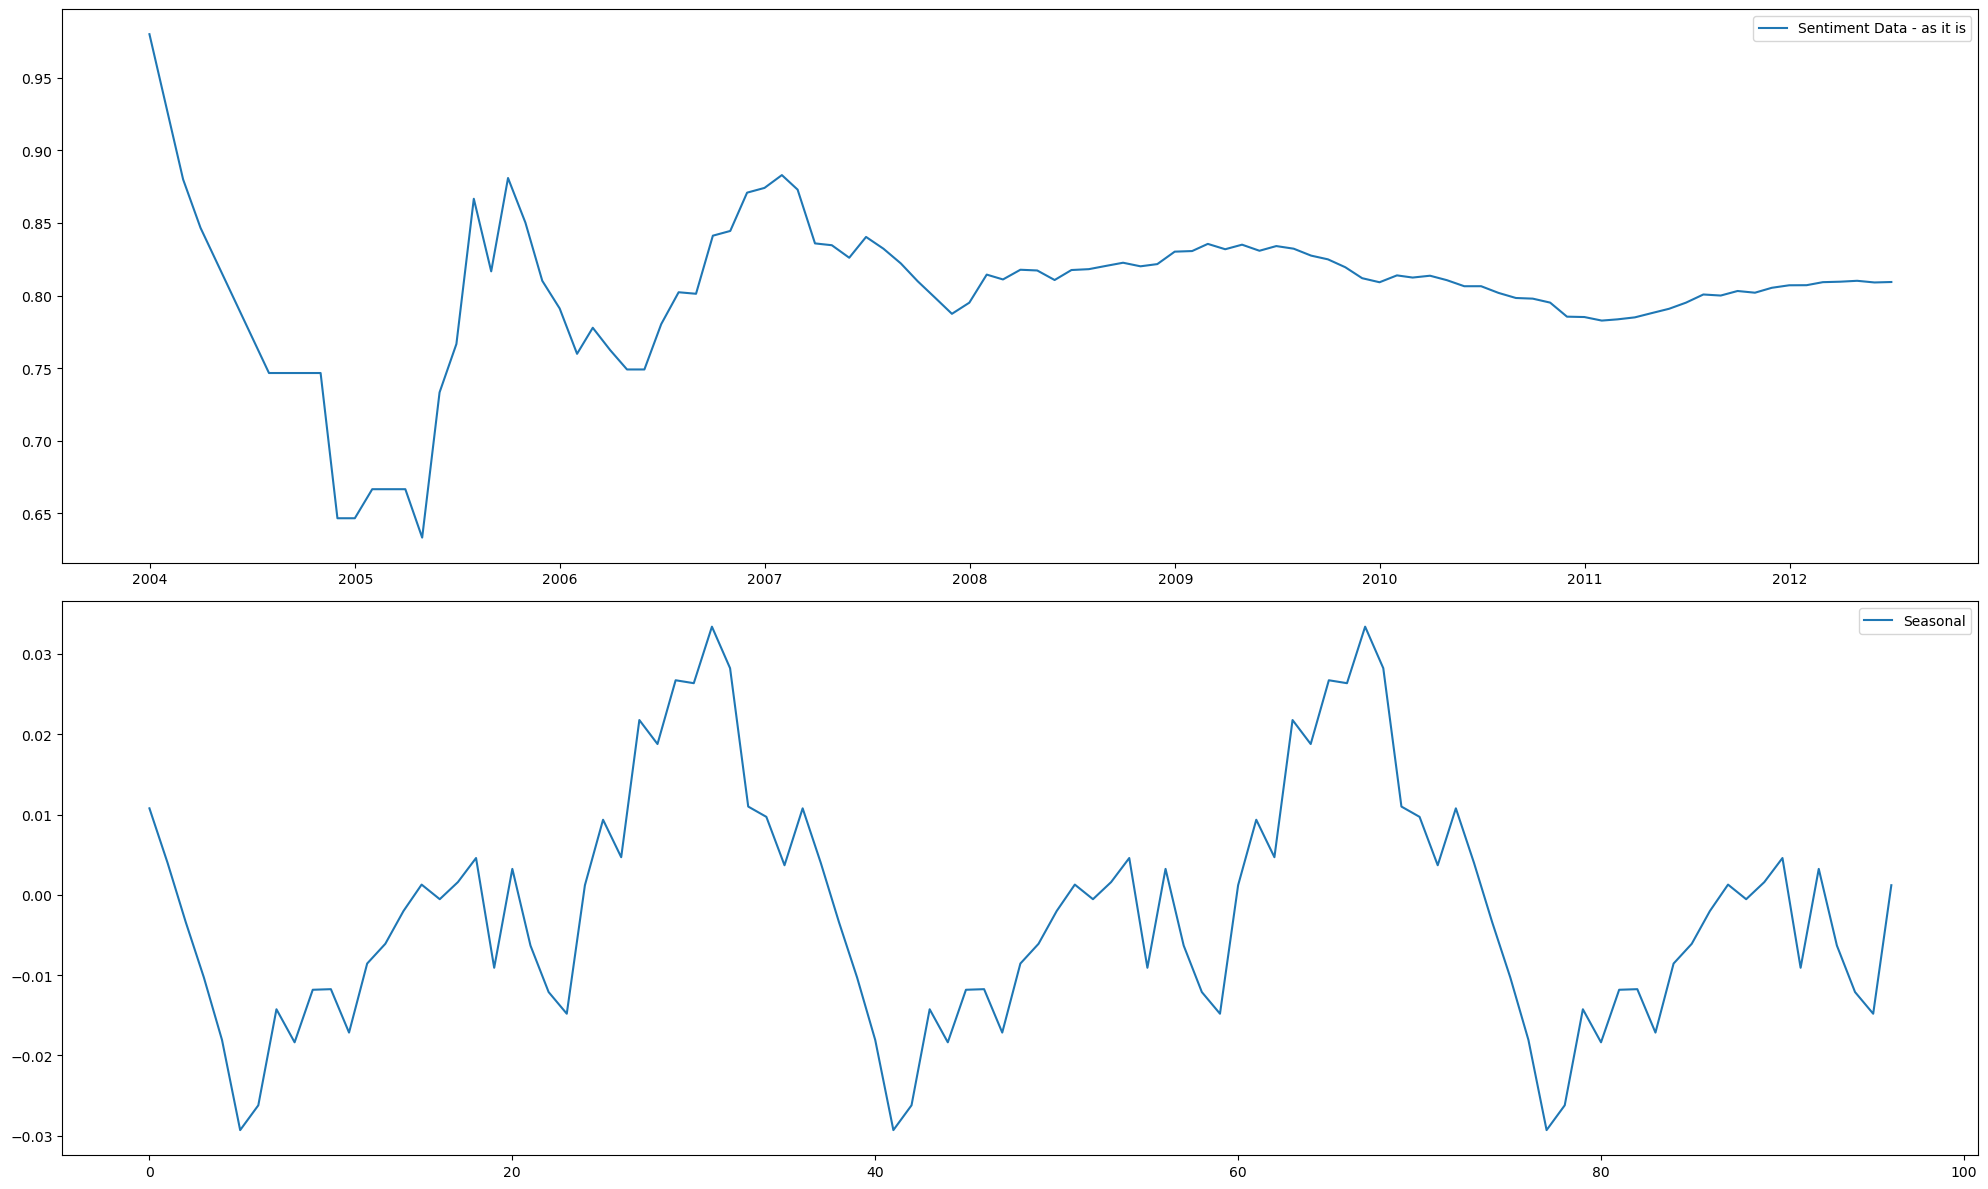

In [70]:
#Seasonal Components
decomposition=seasonal_decompose(np.asarray(trains),freq = 36)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid
# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(211)
plt.plot(trains,label='Sentiment Data - as it is')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')


plt.tight_layout()

      actual  predicted       err
0   0.809916   0.795818  0.014098
1   0.809913   0.788013  0.021900
2   0.810773   0.777441  0.033332
3   0.811062   0.773017  0.038045
4   0.814417   0.749082  0.065335
5   0.818795   0.742646  0.076149
6   0.825359   0.735986  0.089372
7   0.831742   0.736445  0.095298
8   0.837163   0.748477  0.088686
9   0.841838   0.751990  0.089848
10  0.847758   0.761435  0.086322
11  0.851247   0.764015  0.087232
12  0.853448   0.776726  0.076723
13  0.856516   0.780216  0.076300
14  0.856133   0.789759  0.066374
15  0.853148   0.793105  0.060043
16  0.852927   0.805819  0.047108
17  0.850633   0.808941  0.041691
18  0.847823   0.802238  0.045585
19  0.846596   0.807488  0.039109
20  0.846157   0.805906  0.040251
21  0.846768   0.808883  0.037885
22  0.846790   0.810594  0.036196
23  0.846276   0.809699  0.036577
24  0.855266   0.787990  0.067276
Reject H0. Bad model

SARIMA Model. Order=(1,0,0)
	MSE = 0.0039554117042019015
	RMSE = 0.06289206392067206

Wall tim

Text(0.5, 1.0, 'SARIMA Model. Order=(1,0,0)')

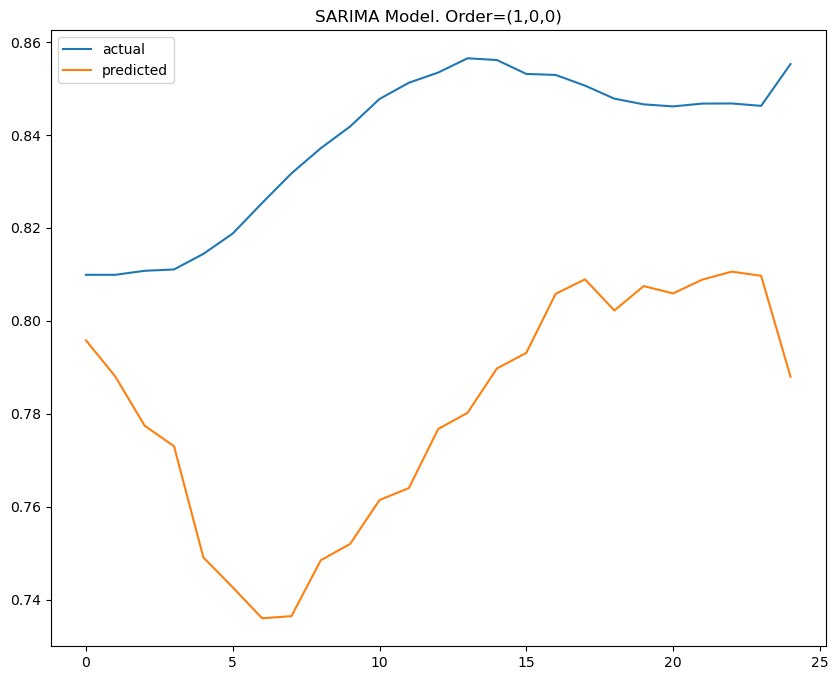

In [71]:
%%time
#SARIMA Model
m_sarima = SARIMAX(trains,order=(p,d,q), seasonal_order=(1,2,0,24)).fit() #0,3,1,0,3
m_sarima.summary()

# predictions
predictions = np.array(m_sarima.forecast(len(tests)))
# actual vs predicted values
actual = []; pred_sarima = []
#appending
for i in range(0,len(predictions)):
    actual.append(np.array(tests)[i][0])
    pred_sarima.append(predictions[i])
# Dataframe actual and predicted
df_res = pd.DataFrame({'actual':actual, 'predicted':pred_sarima})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m_sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")
print()

# RMSE
msg = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))
print()

#Actual and predicted plot
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

In [72]:
#Forecasting sentiments of sports for future years
m_finals = SARIMAX(sports_data,order=(p,d,q), seasonal_order=(1,1,0,12)).fit()
ind = [m_final.forecast(24).index]  # Getting date index from previous forecast
sports_for = m_finals.forecast(24)
sports_for.index = ind
dex = []
for i in sports_for.index:
    dex.append(pd.to_datetime(i)[0])
sports_for.index = dex
sports_for

2014-08-31    0.853666
2014-09-30    0.851382
2014-10-31    0.847935
2014-11-30    0.847680
2014-12-31    0.847332
2015-01-31    0.848202
2015-02-28    0.849836
2015-03-31    0.851427
2015-04-30    0.853194
2015-05-31    0.855537
2015-06-30    0.856384
2015-07-31    0.860722
2015-08-31    0.861048
2015-09-30    0.859203
2015-10-31    0.855451
2015-11-30    0.854710
2015-12-31    0.852811
2016-01-31    0.851197
2016-02-29    0.850856
2016-03-31    0.850981
2016-04-30    0.851812
2016-05-31    0.852591
2016-06-30    0.852444
2016-07-31    0.859220
Name: predicted_mean, dtype: float64

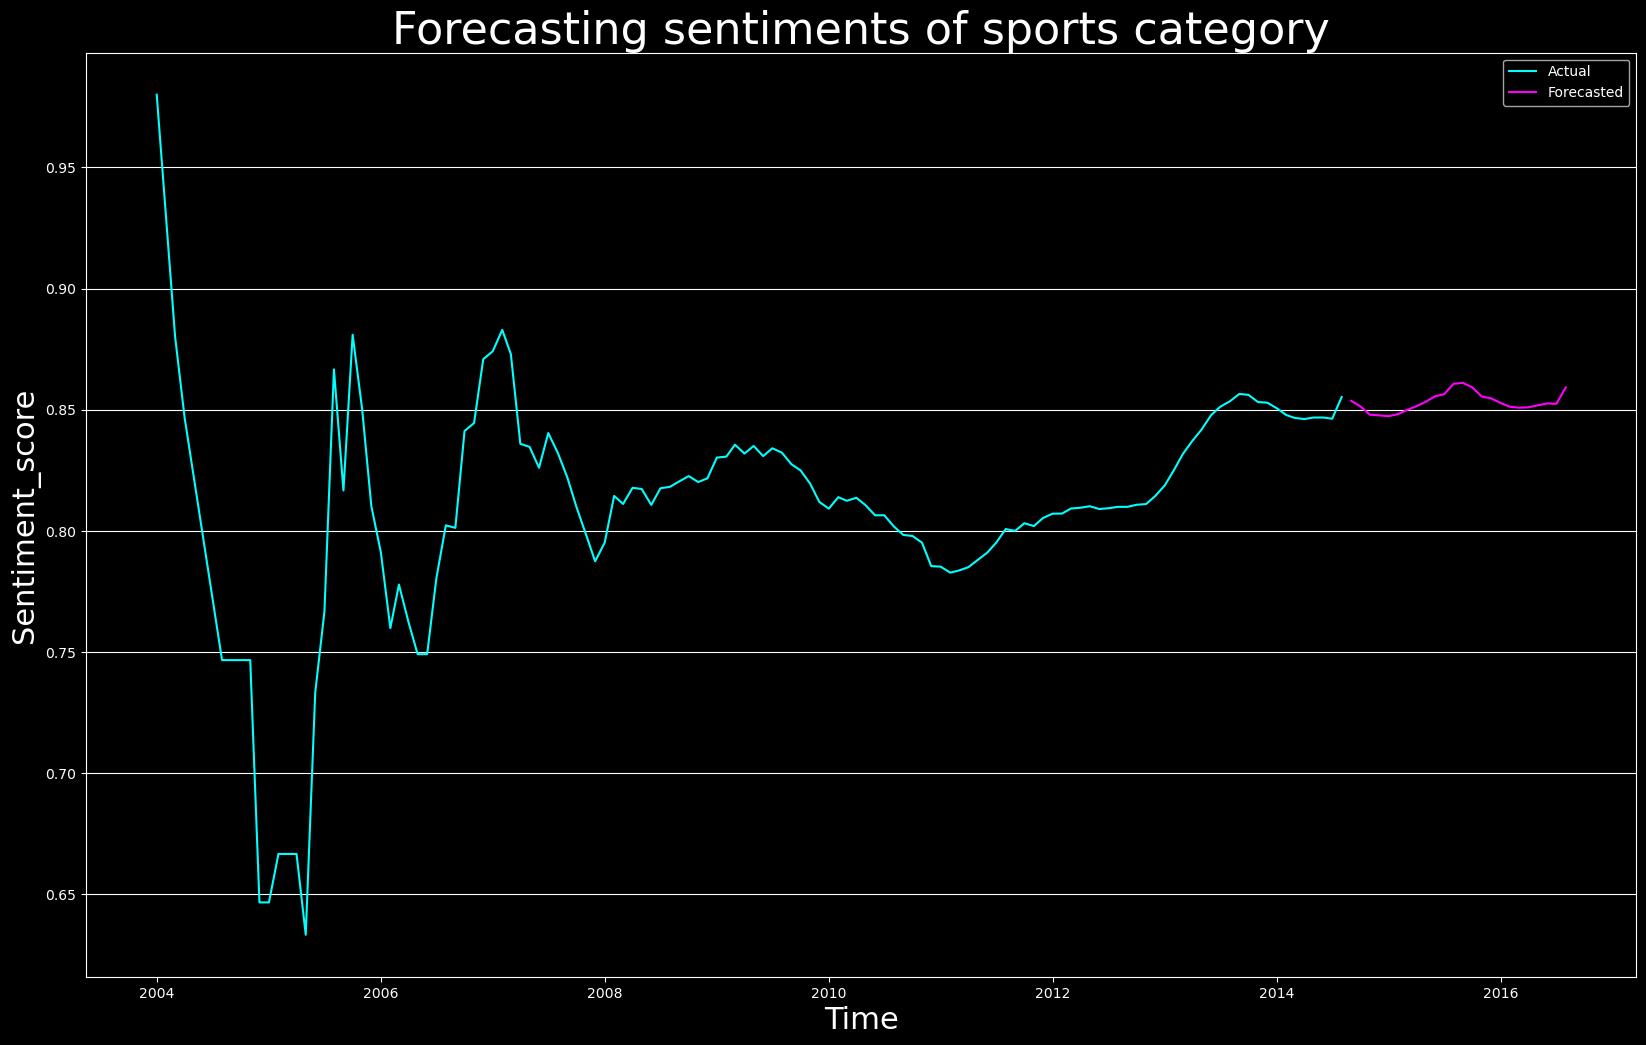

In [73]:
plt.style.use("dark_background")

plt.figure(figsize = (20,12))
plt.plot(sports_data,c = "cyan", label = "Actual")
plt.plot(sports_for, c = "magenta", label = "Forecasted") #forecast for next 24 months
plt.xlabel("Time", fontsize=22)
plt.ylabel("Sentiment_score", fontsize=22)
plt.title("Forecasting sentiments of sports category", fontsize = 32)
plt.grid(axis = 'y')
plt.legend()
plt.show()

### Conclusion: The forecasted trend shows that trend of review sentiments tend to be positive for the upcoming coarse of time.

## 4. Comparison of review trends between Sports-Outdoors and Health & Personal care category

### THis analysis was performed in Tablelau and results are added in PPT.

# END